# fetch some data

In [6]:
# transfer ds to nhi-gpu
import pandas as pd
import json # For dealing with metadata
import os # For file level operations
from datafed.CommandLib import API
df_api = API()

ls_resp = df_api.collectionItemsList('c/391027993', count=50)
print(ls_resp)

(item {
  id: "d/391002274"
  title: "YG_002-100mTorr_Yichen_Guo_03022022"
  owner: "p/2022_pld_plume_recording"
  creator: "u/yig319"
  size: 1076404480.0
  notes: 0
}
item {
  id: "d/391034672"
  title: "YG_002-100mTorr(down)_Yichen_Guo_03022022"
  owner: "p/2022_pld_plume_recording"
  creator: "u/yig319"
  size: 704002432.0
  notes: 0
}
item {
  id: "d/391036190"
  title: "YG_002-110mTorr_Yichen_Guo_03022022"
  owner: "p/2022_pld_plume_recording"
  creator: "u/yig319"
  size: 704002432.0
  notes: 0
}
item {
  id: "d/391037378"
  title: "YG_002-120mTorr_Yichen_Guo_03022022"
  owner: "p/2022_pld_plume_recording"
  creator: "u/yig319"
  size: 704002432.0
  notes: 0
}
item {
  id: "d/391036825"
  title: "YG_002-120mTorr(down)_Yichen_Guo_03022022"
  owner: "p/2022_pld_plume_recording"
  creator: "u/yig319"
  size: 704002432.0
  notes: 0
}
item {
  id: "d/391037980"
  title: "YG_002-130mTorr_Yichen_Guo_03022022"
  owner: "p/2022_pld_plume_recording"
  creator: "u/yig319"
  size: 704002432

In [10]:
dv_resp = df_api.dataView('d/398528481')
metadata = json.loads(dv_resp[0].data[0].metadata)
print(metadata)

id_index = dv_resp[0].data[0].id
get_resp = df_api.dataGet(id_index, '/scratch/yichen/pld_plumes/', orig_fname=True, wait=True)
get_resp

{'header': {'Base Pressure (Torr)': '5e-5', 'Chamber': 'Laser 1C', 'Cool Down Atmosphere': 'Oxygen', 'Date': '06/08/2022', 'Growth ID': 'YG031', 'Notes': 'Do three growths in a row without taking out and sanding target. This is another series of experiments to comfirm the consistency for conclusion from YG028-030. First growth(target falls back during growth, redo this)', 'Path': 'C:/Image/', 'Substrate_1': 'SrTiO3', 'User Name': 'Yichen_Guo', 'time': '08:50:45'}, 'target_1': {'Aperture': '12.5', 'Atmosphere Gas': 'Oxygen', 'Attenuator(mm)': '2thin', 'Focus(mm)': '130', 'Frequency(Hz)': '10', 'Laser Energy(mJ)': '100', 'Laser Voltage(kV)': '17.4', 'Measured Energy Mean(mJ)': '101', 'Measured Energy Std(mJ)': '2.41', 'Pre-Frequency(Hz)': '20', 'Pre-Gas Atmosphere': 'Oxygen', 'Pre-Pressure(mTorr)': '200', 'Pre-Pulses': '1500', 'Pre-Temperature(°C)': '700', 'Pressure(mTorr)': '200', 'Pulses': '3500', 'Target Height(mm)': '128.4', 'Target Material': 'SrRuO3(Berkeley_1C)', 'Temperature(°C)'

(task {
   id: "task/398810756"
   type: TT_DATA_GET
   status: TS_SUCCEEDED
   client: "u/yig319"
   step: 2
   steps: 3
   msg: "Finished"
   ct: 1654991405
   ut: 1654991416
   source: "d/398528481"
   dest: "lehigh#nhi-gpu/scratch/yichen/pld_plumes"
 },
 'TaskDataReply')

# plot

In [12]:
import numpy as np
import sys
sys.path.append('./PLD_Workflow/')
from utils import show_h5_dataset_name
from utils import load_h5_examples
from utils import show_images
from PlumeEvaluation import PlumeMetrics
from PlumeEvaluation import plot_metrics
from PlumeEvaluation import plot_metrics_heatmap

def process_func(images):
    '''
    An example process function to preprocess images before conducting following steps

    :param images: images to preprocess
    :type images: np.array
    '''

    images = images[np.random.randint(0, images.shape[0])]
    return images

def plot_metrics_all_steps(ds_path, class_name, ds_name, condition):
    plumes = load_h5_examples(ds_path, class_name, ds_name, process_func, show=False)
    show_images(np.mean(plumes, axis=0), img_per_row=10)

    m = PlumeMetrics(plumes, condition)

    metrics_np = m.get_metrics()
    metrics_df = m.to_df(metrics_np)
    print(metrics_df.sample(n=5))

    plot_metrics(metrics_df, sort_by='growth_index')
    plot_metrics_heatmap(metrics_df, frame_range=(8, 46))
    
    return metrics_df

In [15]:
ds_path = '/scratch/yichen/pld_plumes/YG031_Yichen_Guo_06082022.h5'
class_name = 'PLD_Plumes'
show_h5_dataset_name(ds_path, class_name)

<KeysViewHDF5 ['1-SrRuO3(Berkeley_1C)', '1-SrRuO3(Berkeley_1C)_Pre']>


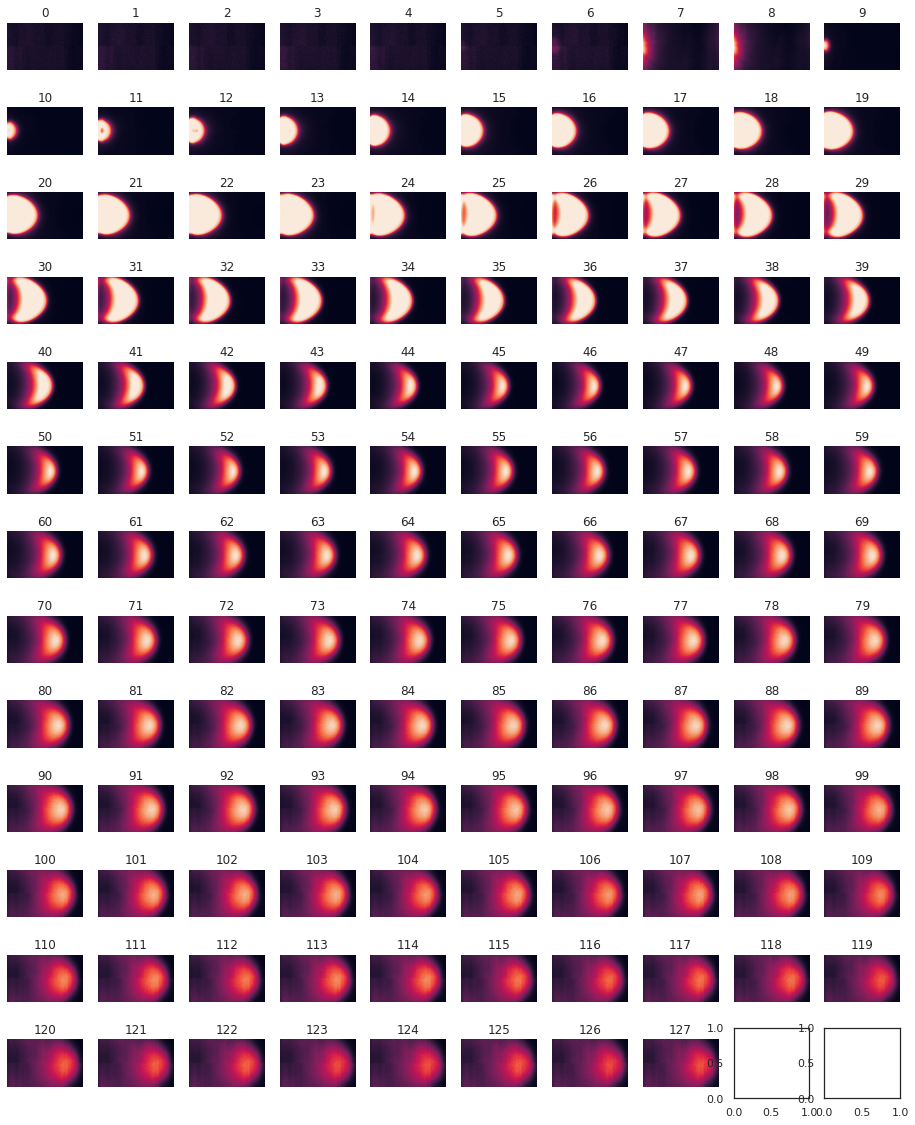

                                condition             metric  growth_index  \
54352  100mj-700c-200mtorr-10hz-growth_1*           distance            10   
50116  100mj-700c-200mtorr-10hz-growth_1*          perimeter            23   
16695  100mj-700c-200mtorr-10hz-growth_1*  axis_major_length            38   
3305   100mj-700c-200mtorr-10hz-growth_1*               area            25   
63528  100mj-700c-200mtorr-10hz-growth_1*           velocity            36   

       time_step   a.u.  
54352         80  230.0  
50116         68    0.0  
16695         55    0.0  
3305         105    0.0  
63528         40    1.0  
area


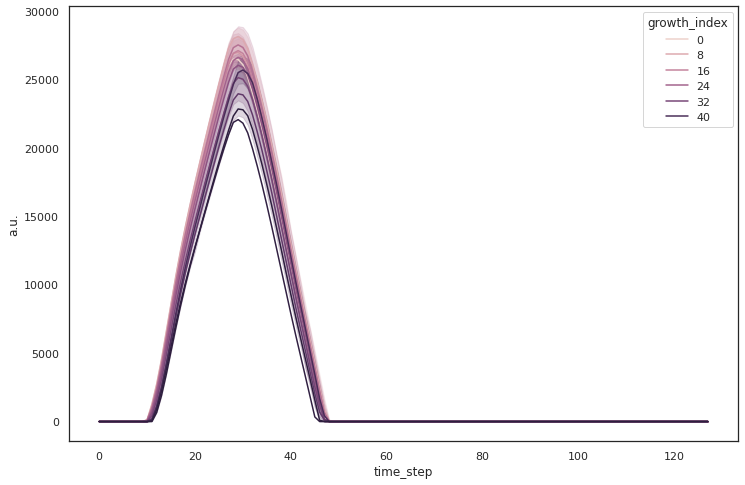

area_filled


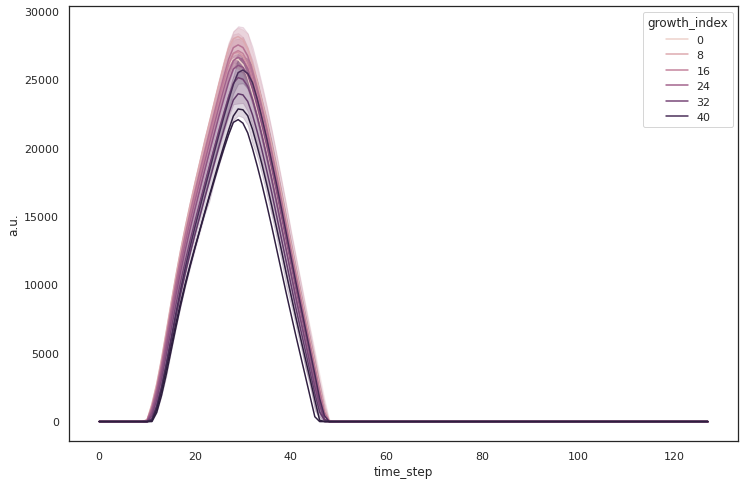

axis_major_length


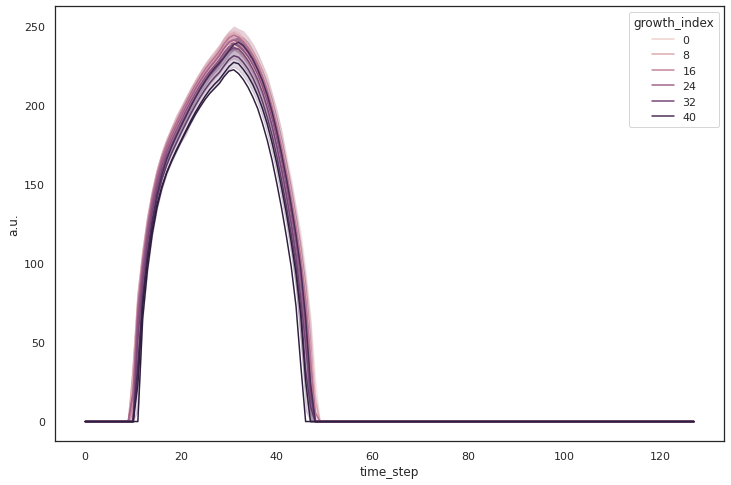

axis_minor_length


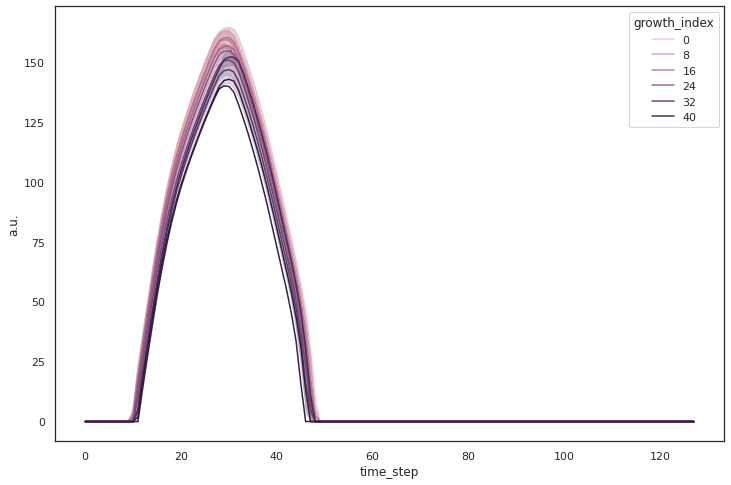

centroid-1


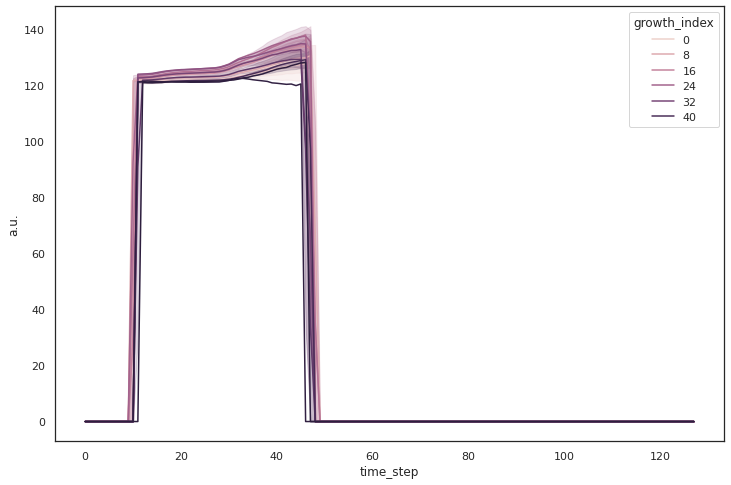

centroid-2


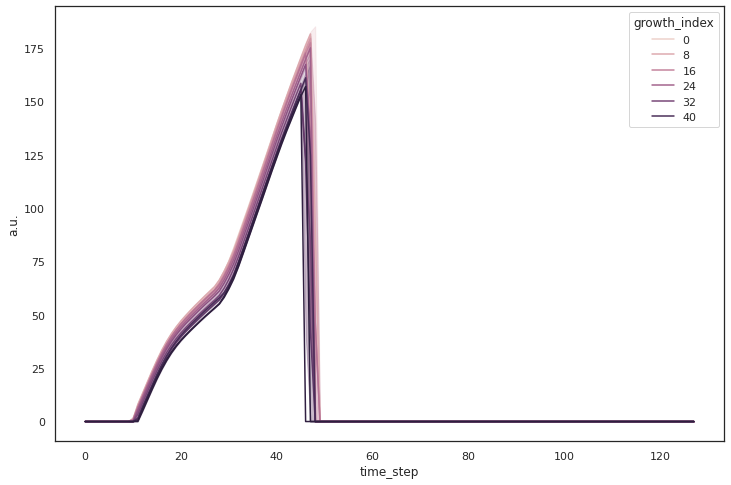

orientation


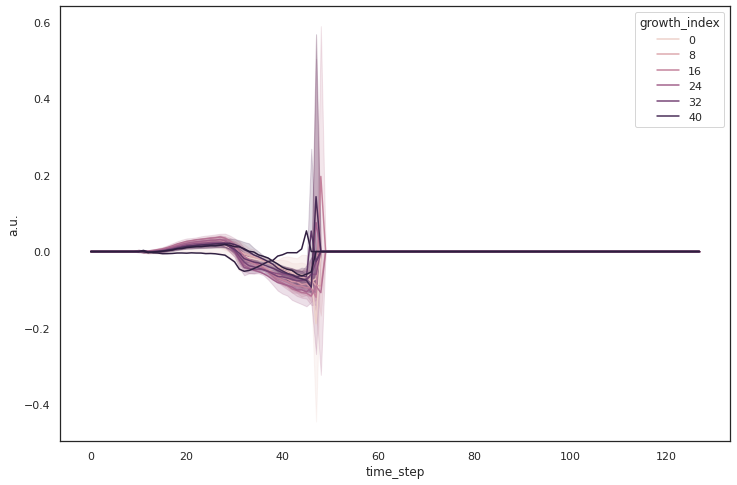

eccentricity


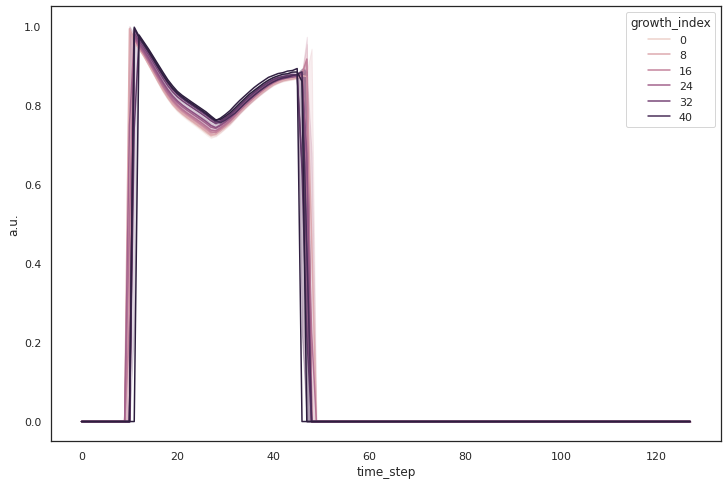

perimeter


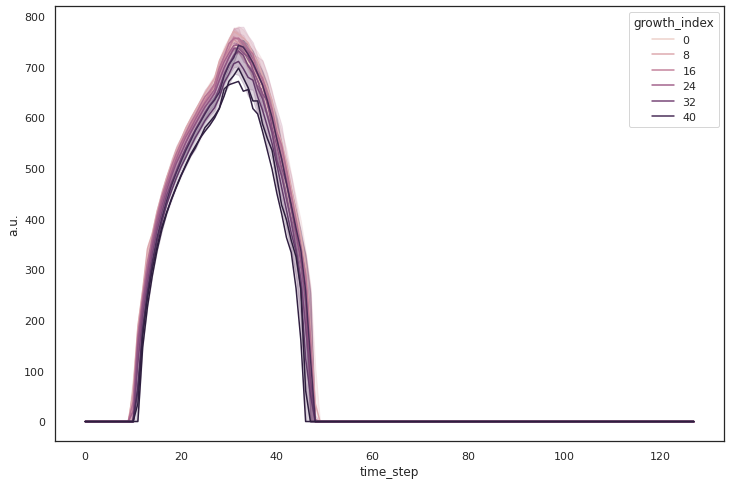

distance


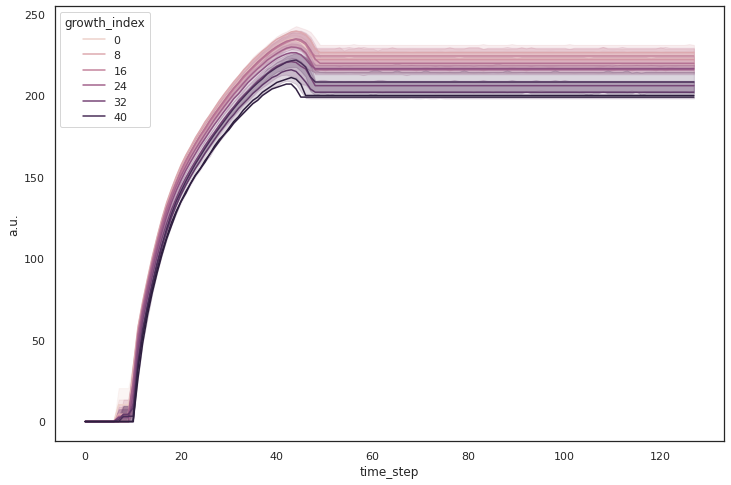

velocity


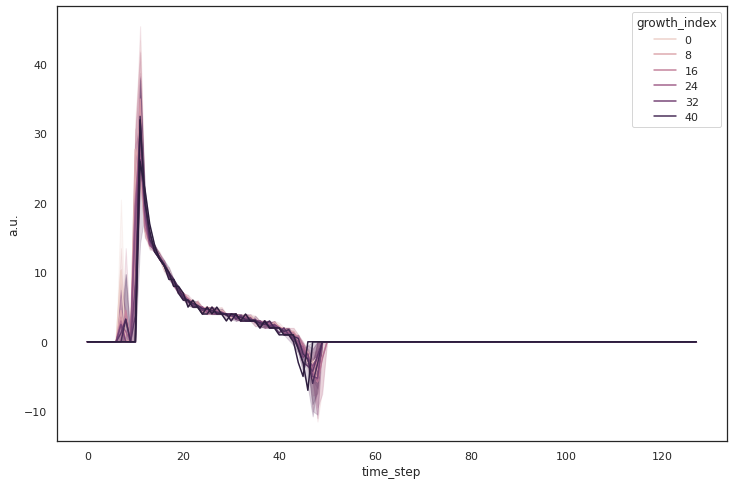

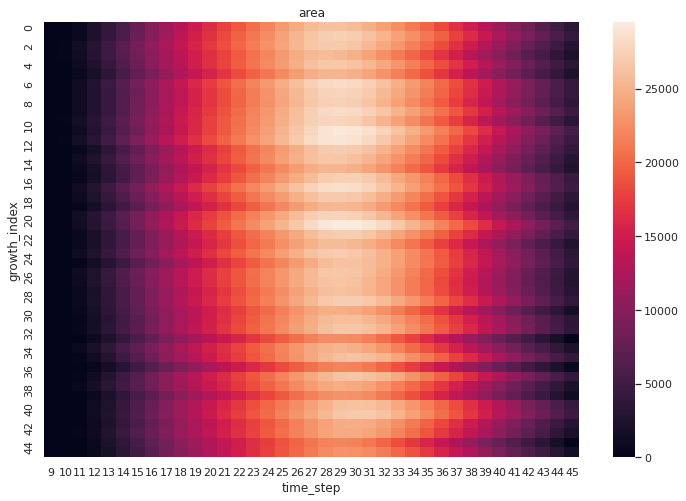

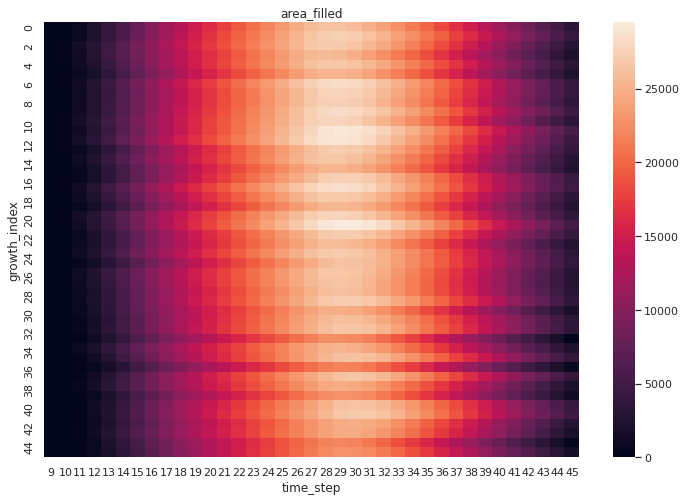

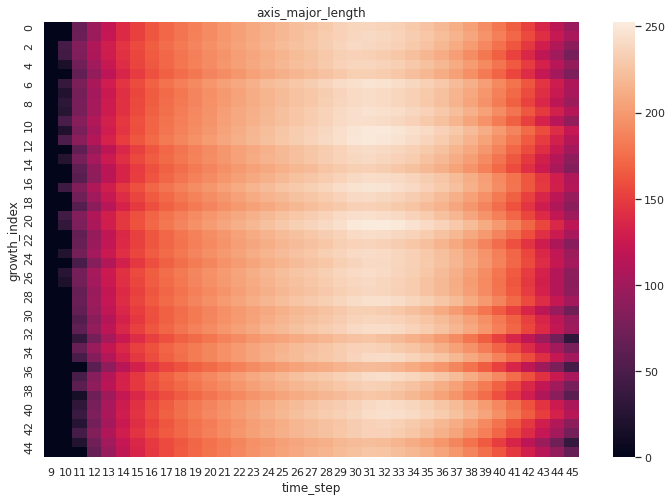

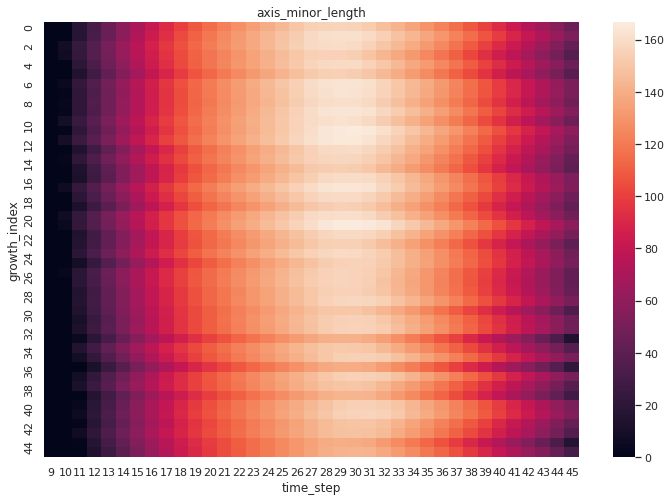

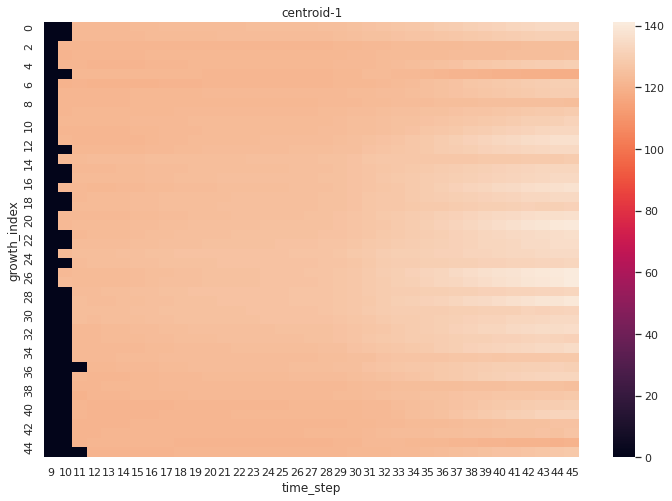

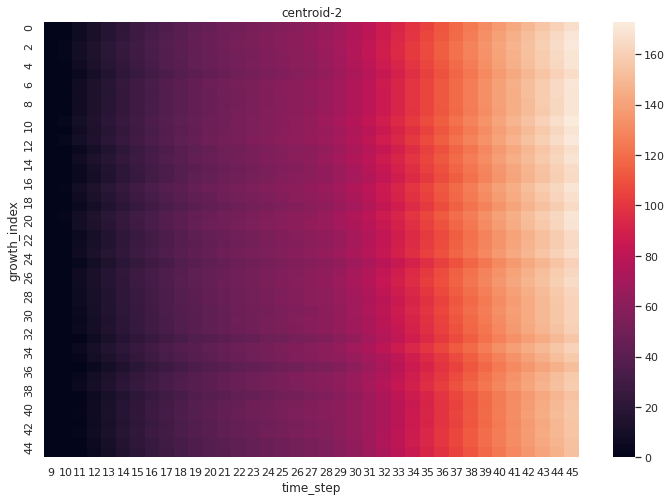

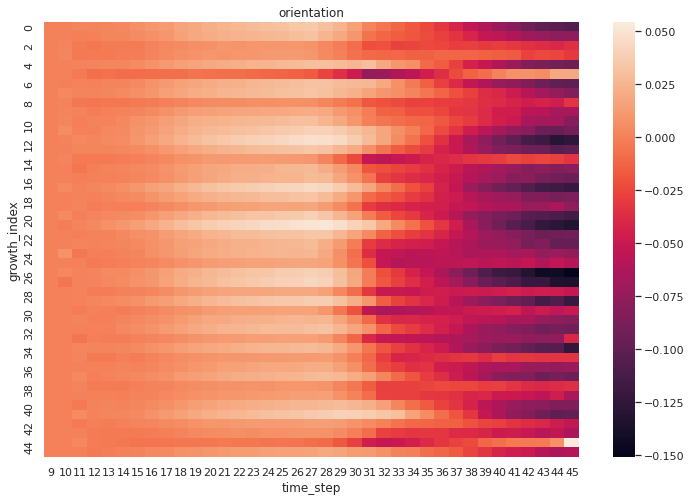

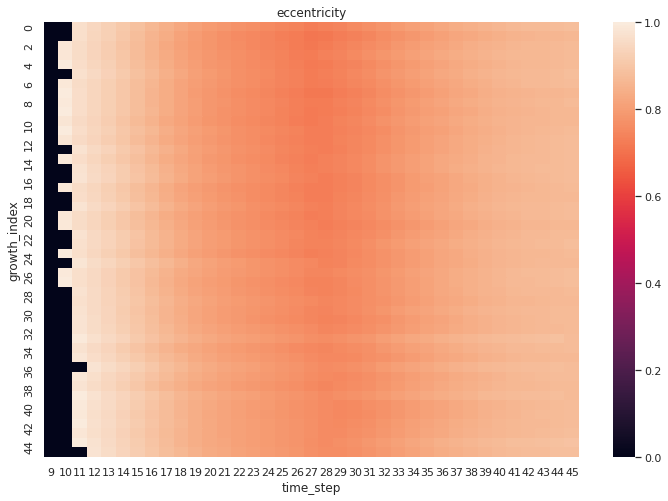

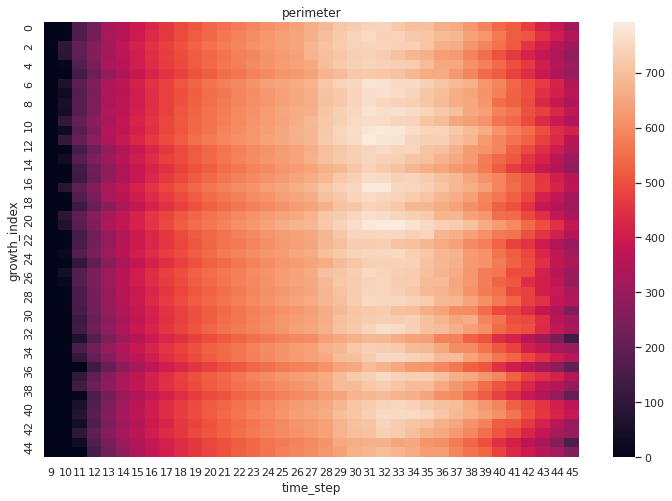

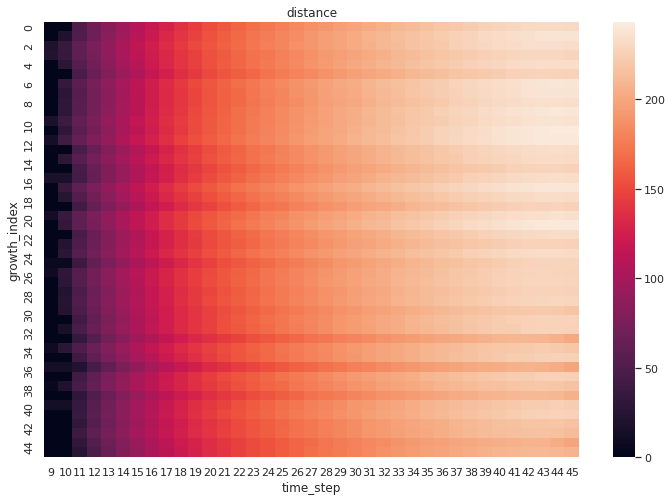

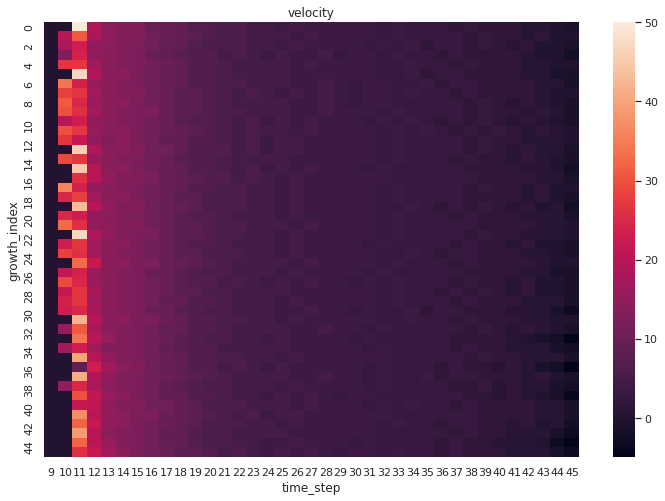

In [16]:
ds_name = '1-SrRuO3(Berkeley_1C)'
condition = '100mj-700c-200mtorr-10hz-growth_1*'
df_1 = plot_metrics_all_steps(ds_path, class_name, ds_name, condition)

In [18]:
ds_path = '/scratch/yichen/pld_plumes/YG032_Yichen_Guo_06112022.h5'
class_name = 'PLD_Plumes'
show_h5_dataset_name(ds_path, class_name)

<KeysViewHDF5 ['1-SrRuO3(Berkeley_1C)', '1-SrRuO3(Berkeley_1C)_Pre']>


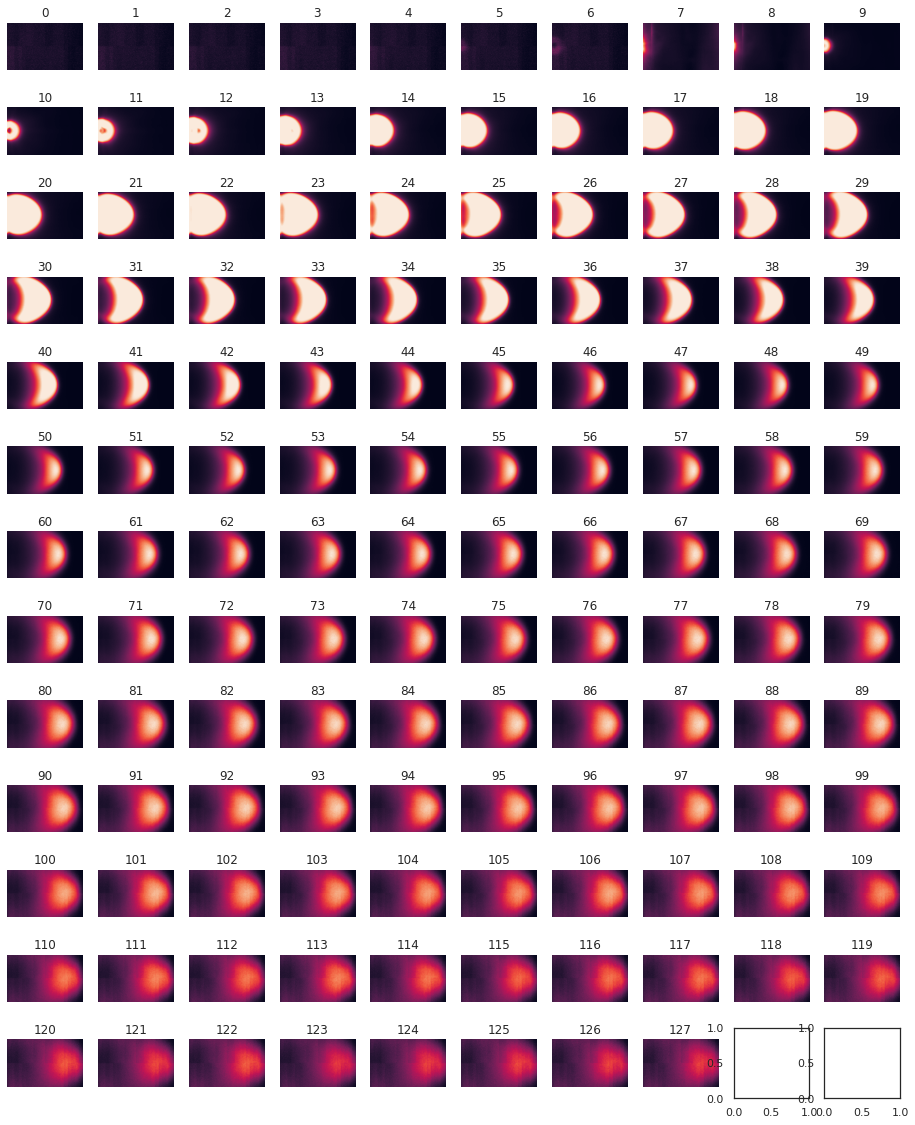

                               condition             metric  growth_index  \
7354   100mj-700c-200mtorr-10hz-growth_1        area_filled            17   
12430  100mj-700c-200mtorr-10hz-growth_1  axis_major_length            17   
36596  100mj-700c-200mtorr-10hz-growth_1       eccentricity             5   
46128  100mj-700c-200mtorr-10hz-growth_1           distance             0   
33815  100mj-700c-200mtorr-10hz-growth_1        orientation            24   

       time_step        a.u.  
7354          58    0.000000  
12430         14  154.102341  
36596        116    0.000000  
46128         48  245.000000  
33815         23   -0.011199  
area


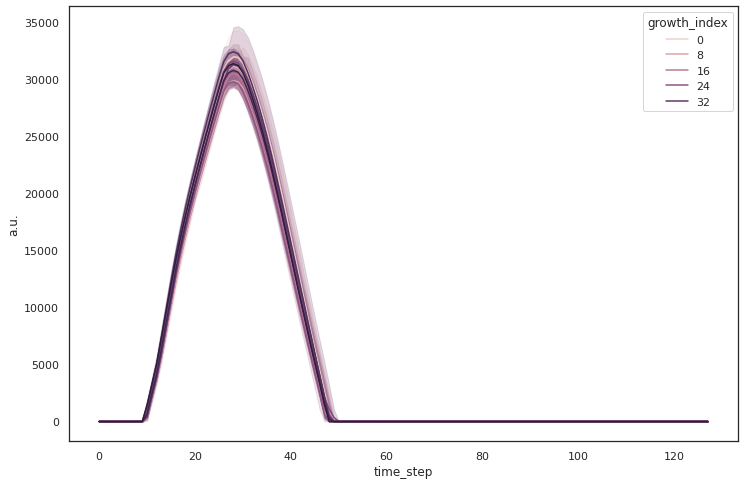

area_filled


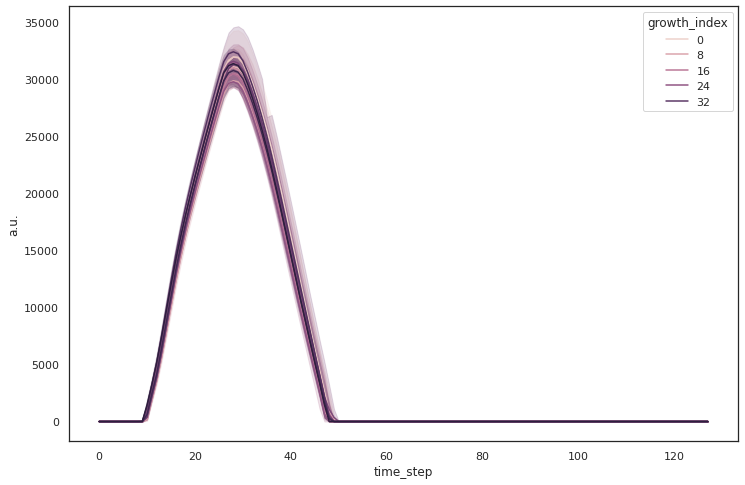

axis_major_length


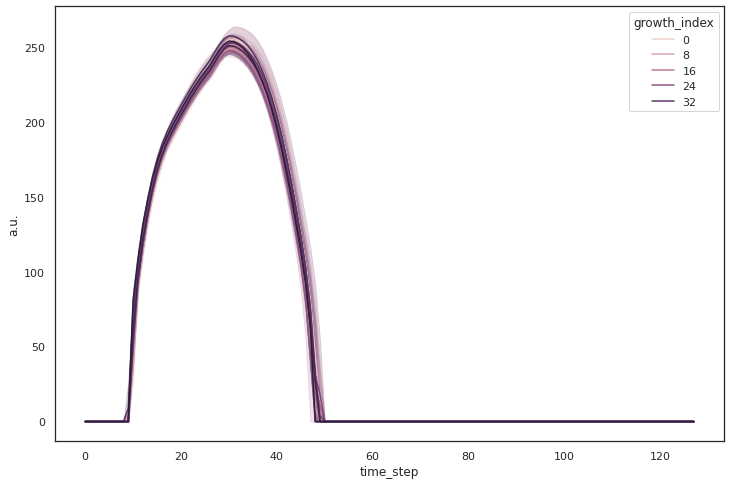

axis_minor_length


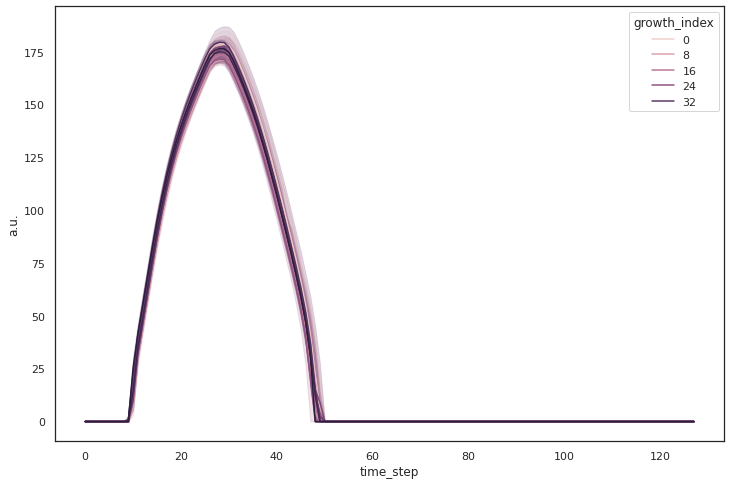

centroid-1


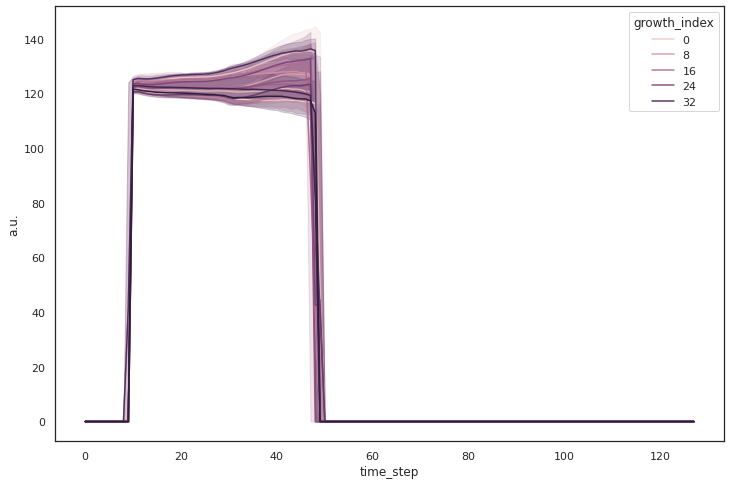

centroid-2


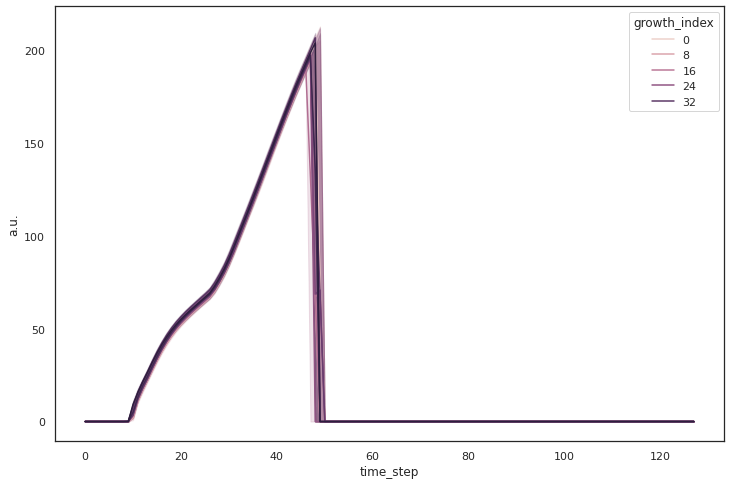

orientation


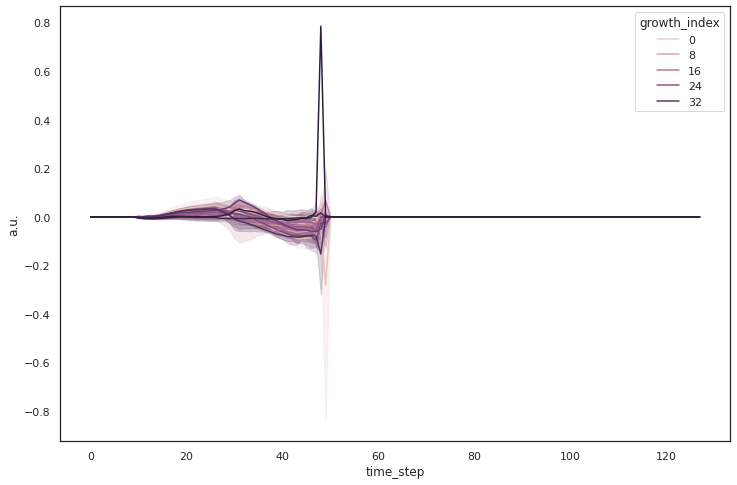

eccentricity


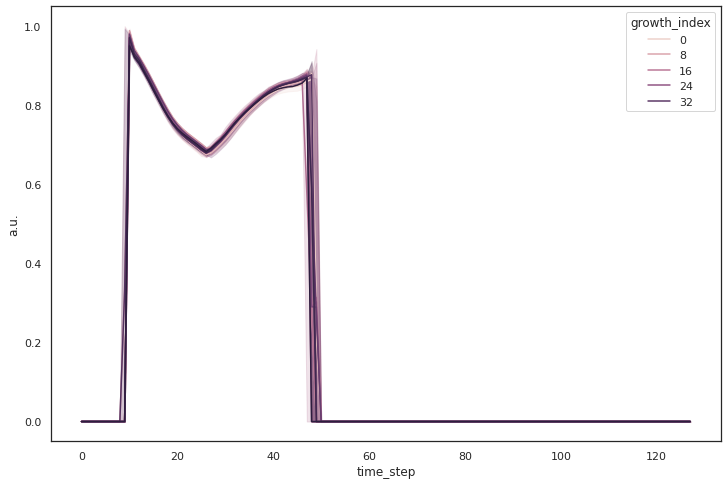

perimeter


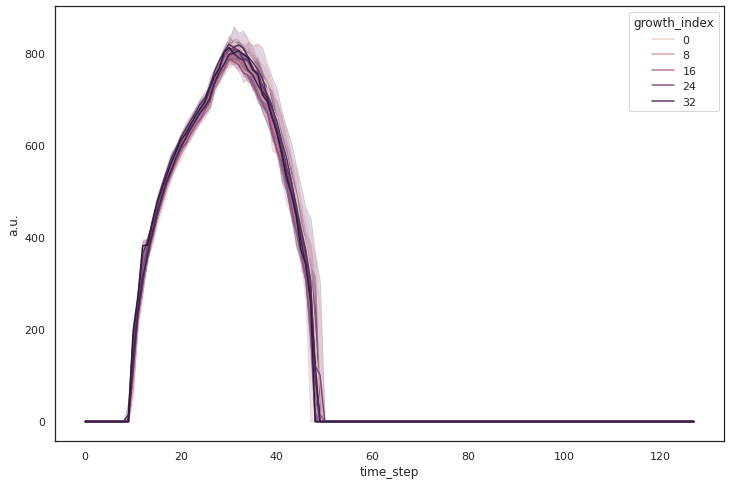

distance


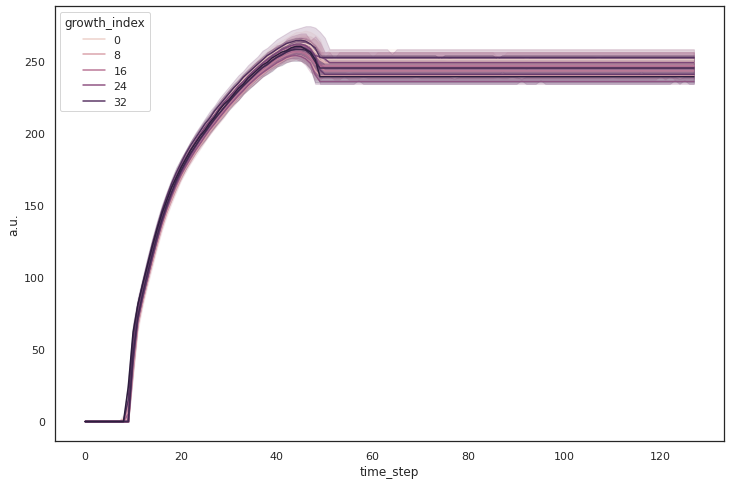

velocity


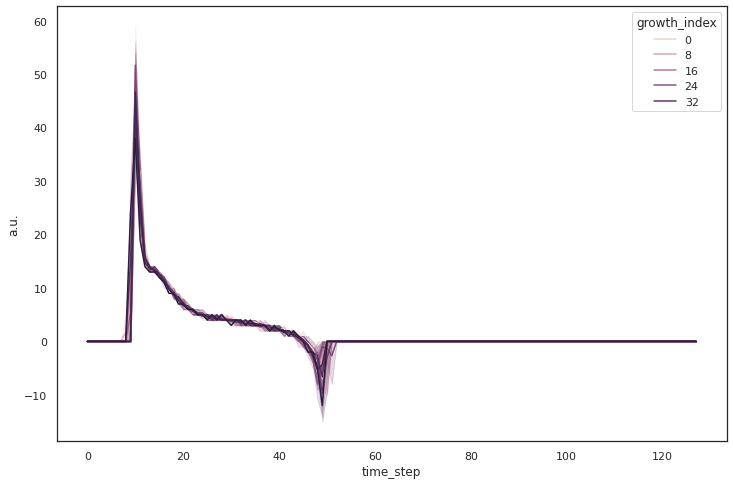

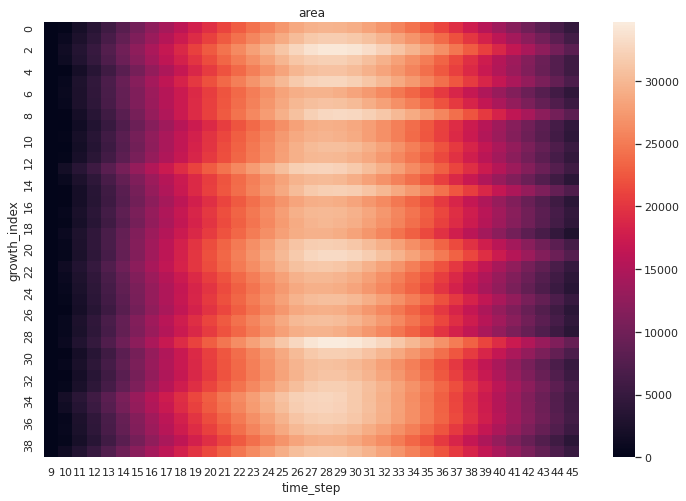

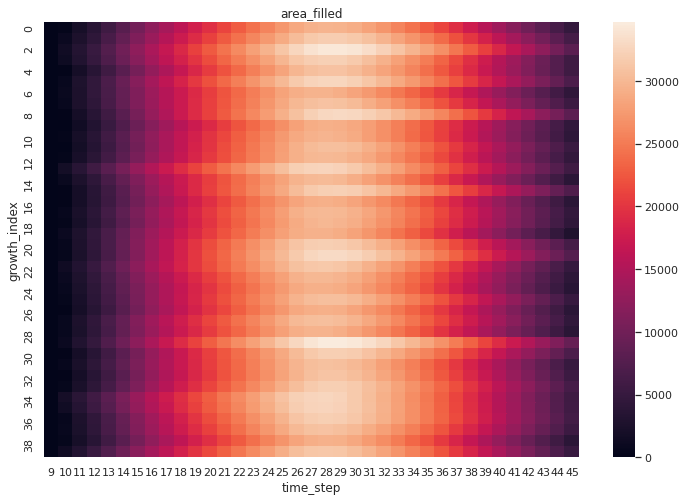

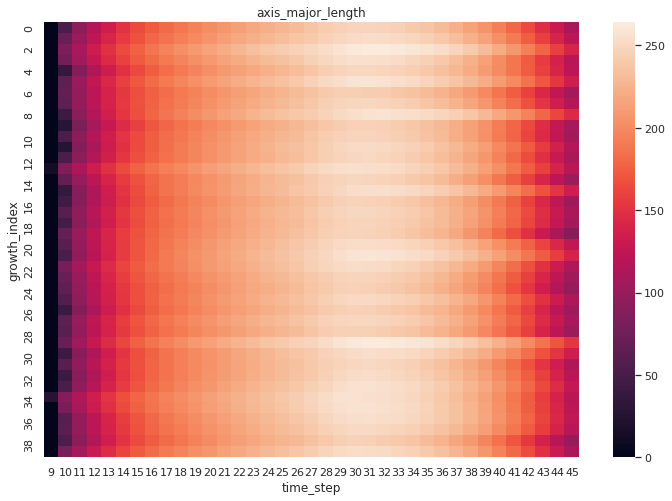

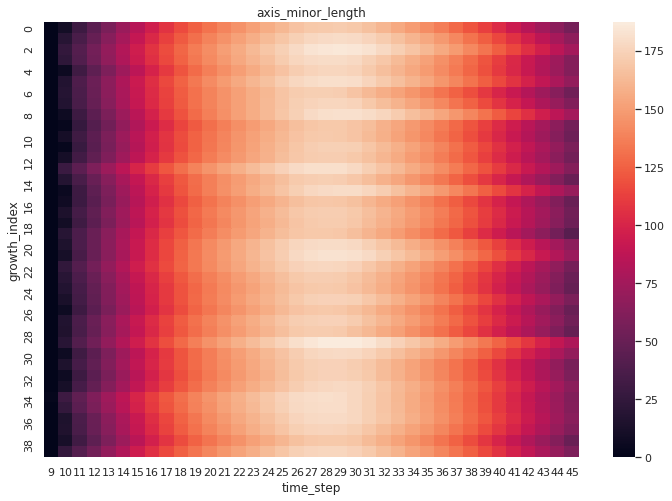

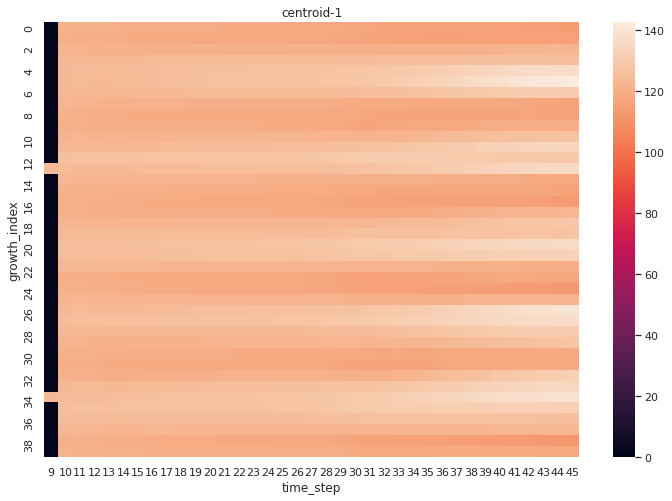

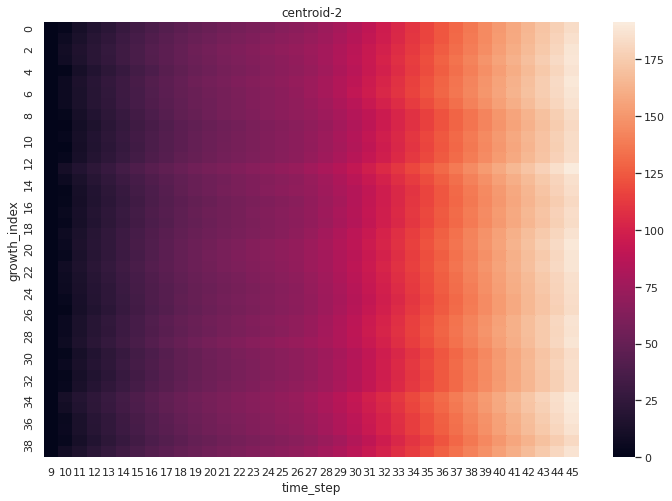

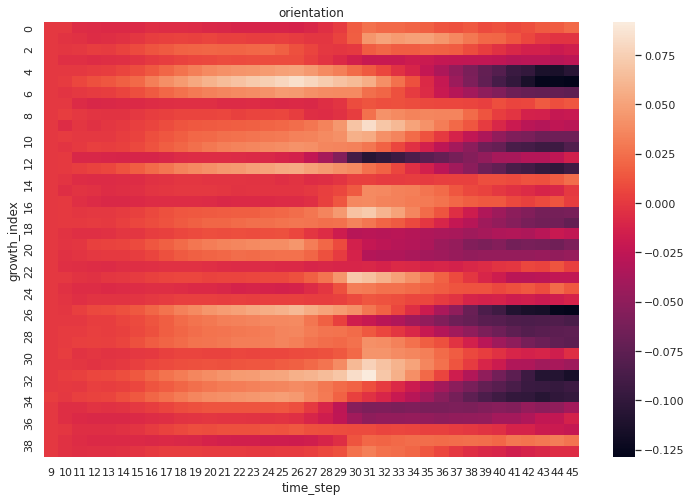

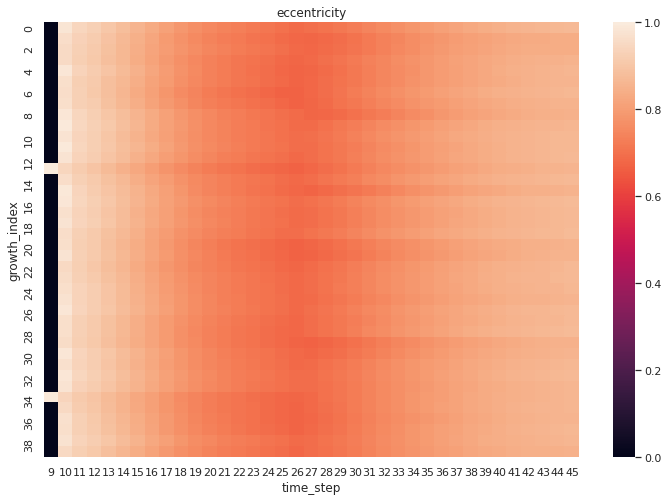

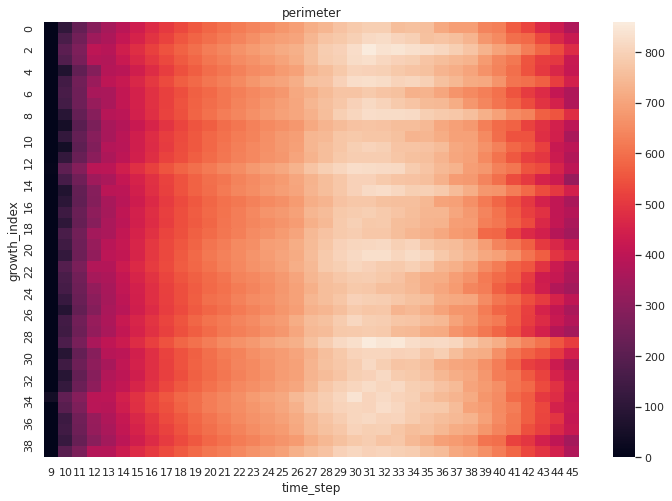

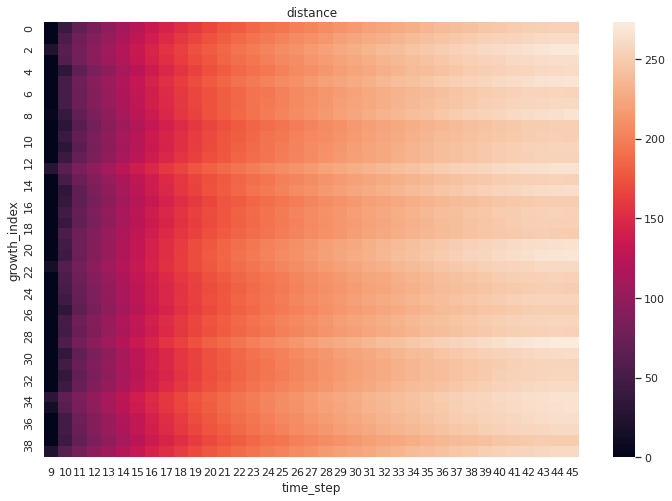

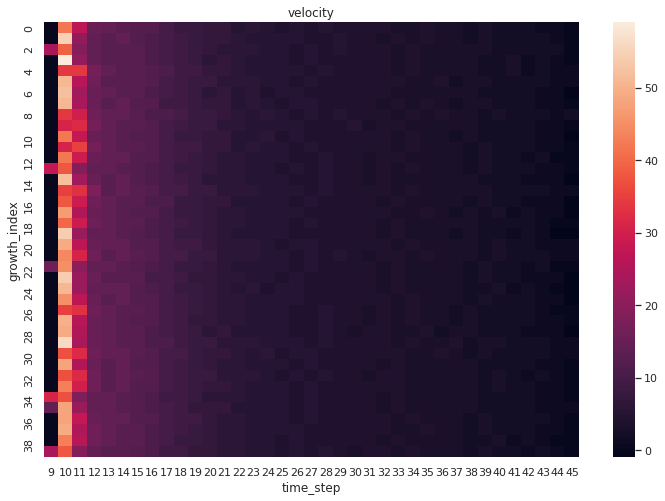

In [19]:
ds_name = '1-SrRuO3(Berkeley_1C)'
condition = '100mj-700c-200mtorr-10hz-growth_1'
df_2 = plot_metrics_all_steps(ds_path, class_name, ds_name, condition)

In [20]:
ds_path = '/scratch/yichen/pld_plumes/YG033_Yichen_Guo_06112022.h5'
class_name = 'PLD_Plumes'
show_h5_dataset_name(ds_path, class_name)

<KeysViewHDF5 ['1-SrRuO3(Berkeley_1C)', '1-SrRuO3(Berkeley_1C)_Pre']>


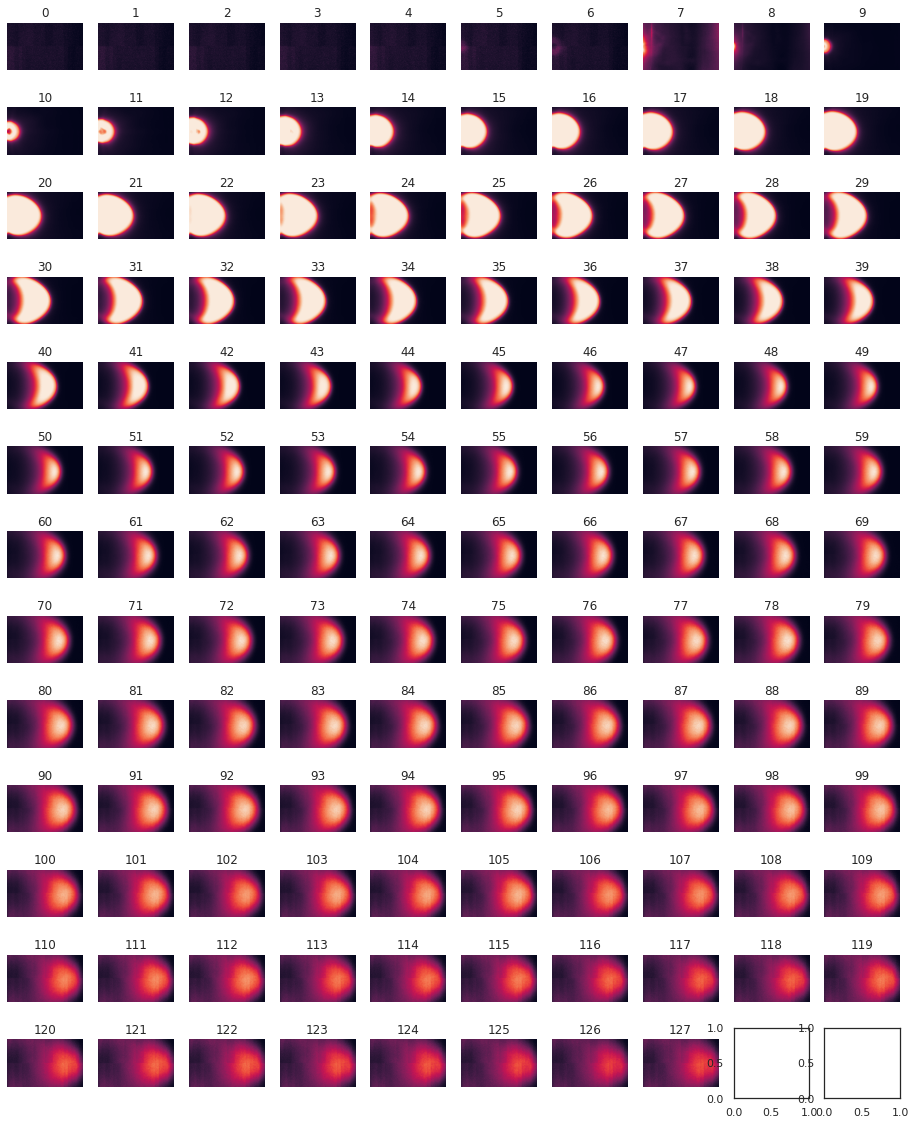

                               condition             metric  growth_index  \
2967   100mj-700c-200mtorr-10hz-growth_2               area            23   
55404  100mj-700c-200mtorr-10hz-growth_2           velocity            32   
8448   100mj-700c-200mtorr-10hz-growth_2        area_filled            26   
15792  100mj-700c-200mtorr-10hz-growth_2  axis_minor_length             3   
47791  100mj-700c-200mtorr-10hz-growth_2           distance            13   

       time_step     a.u.  
2967          23  26815.0  
55404        108      0.0  
8448           0      0.0  
15792         48      0.0  
47791         47    254.0  
area


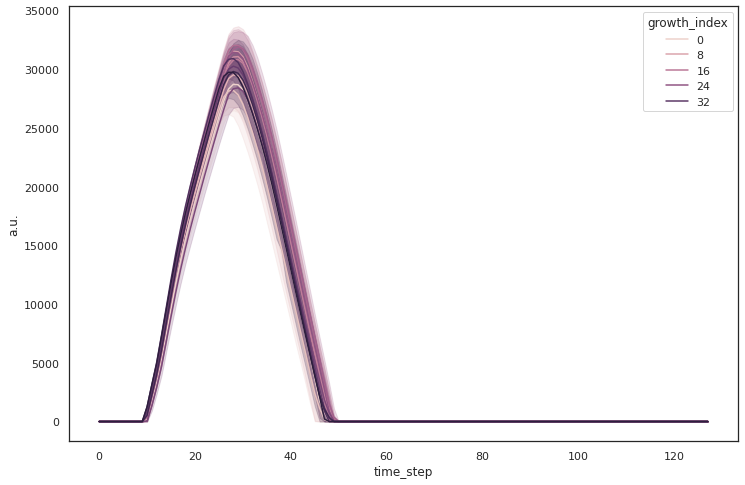

area_filled


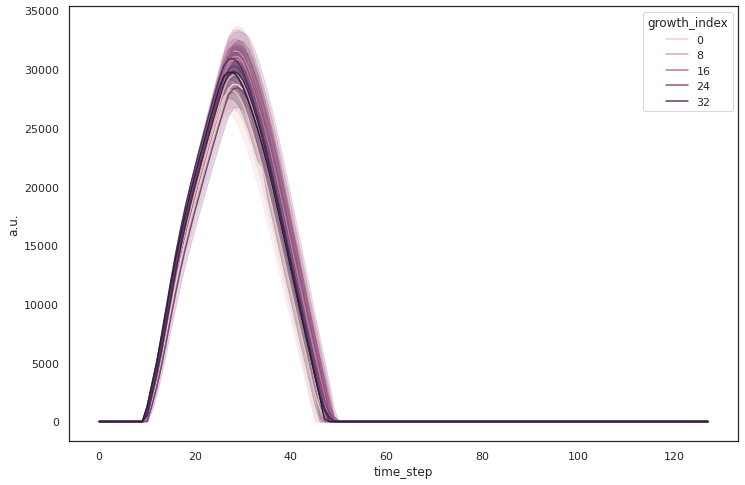

axis_major_length


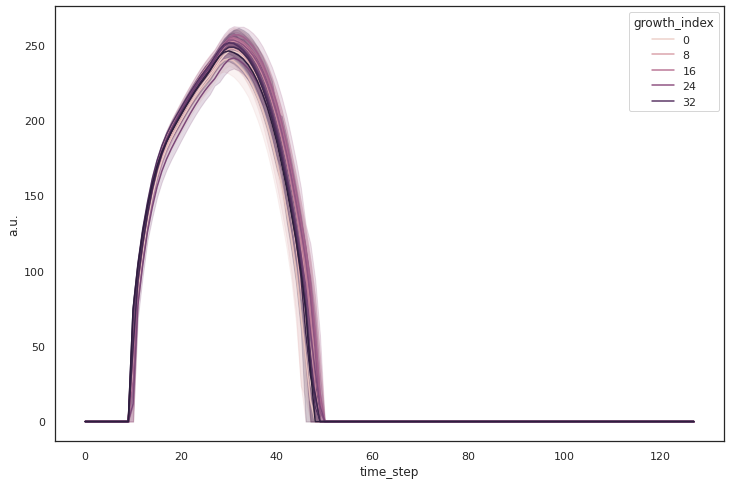

axis_minor_length


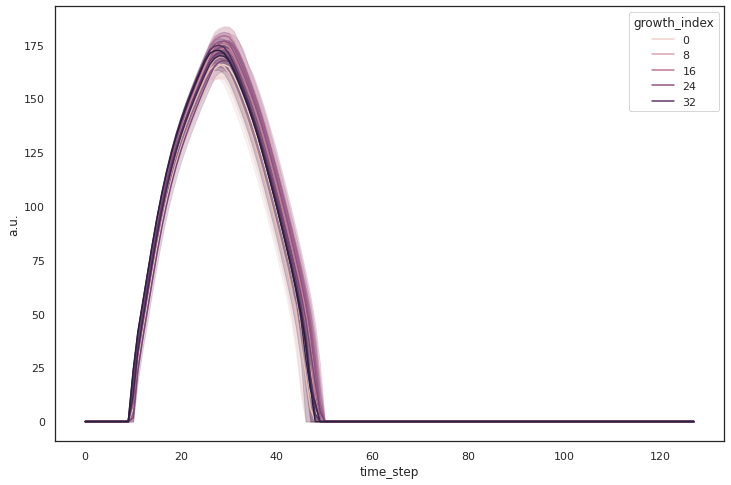

centroid-1


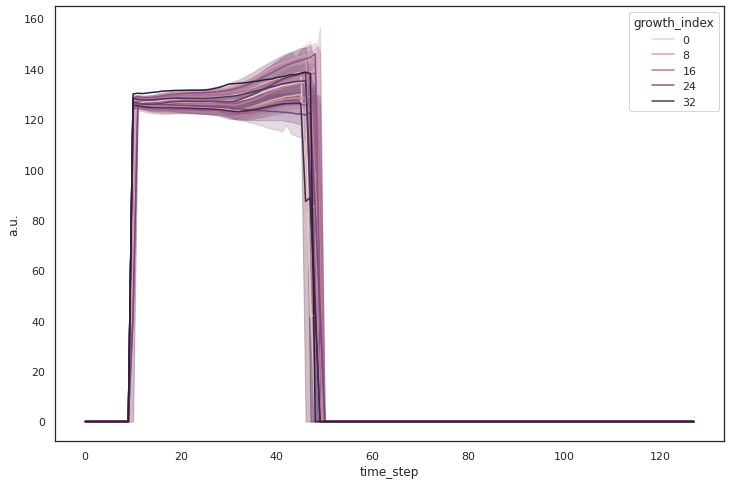

centroid-2


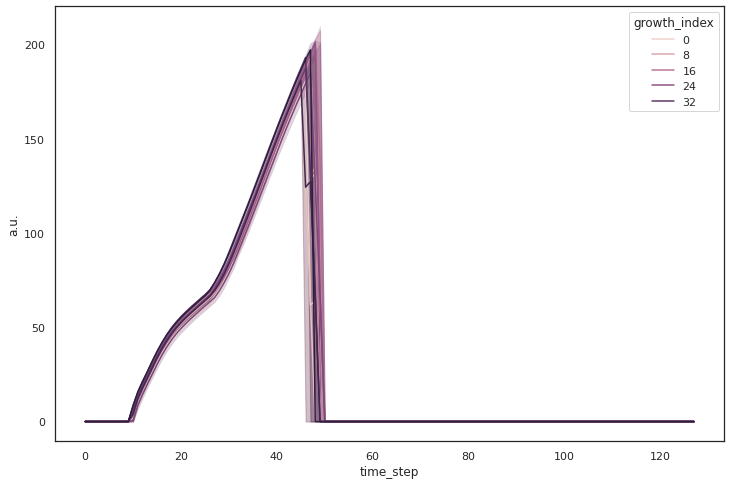

orientation


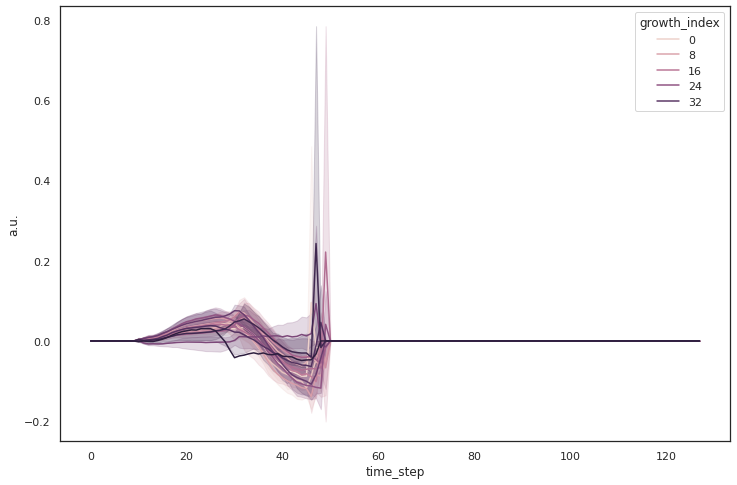

eccentricity


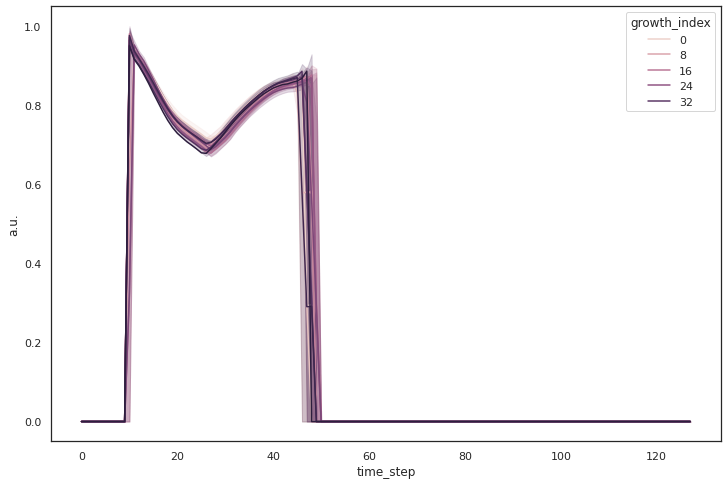

perimeter


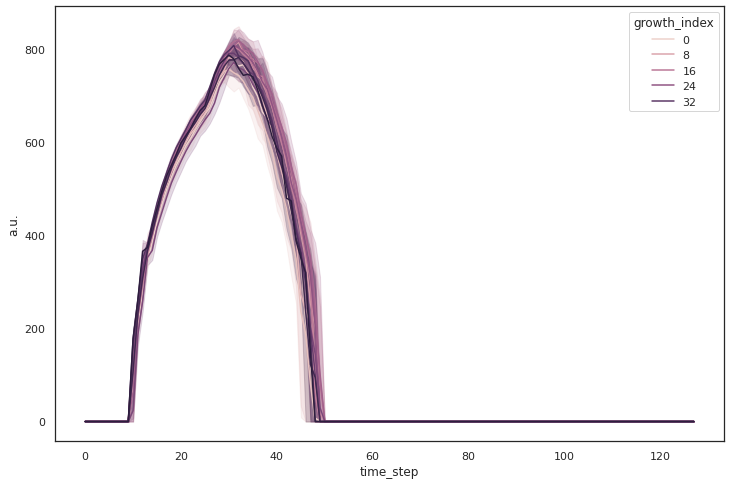

distance


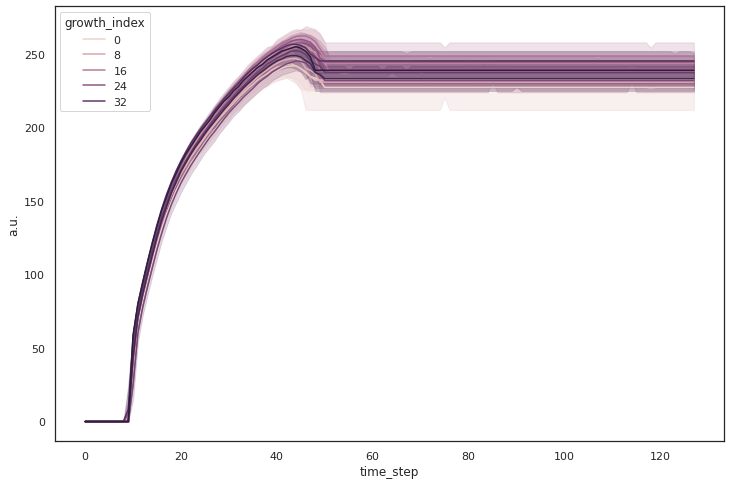

velocity


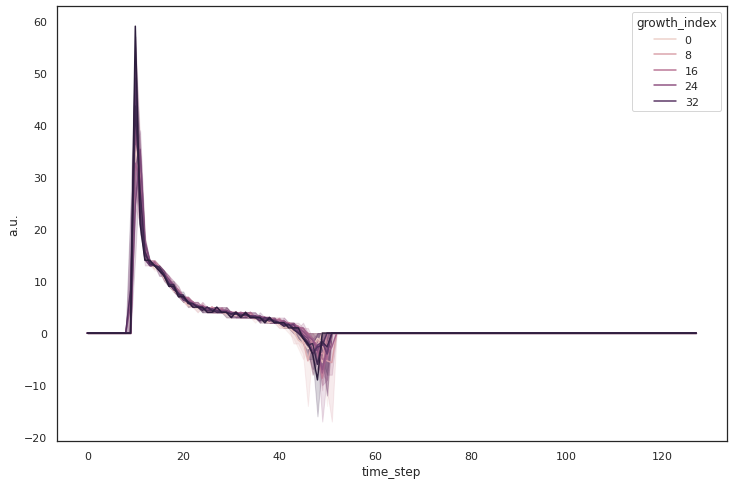

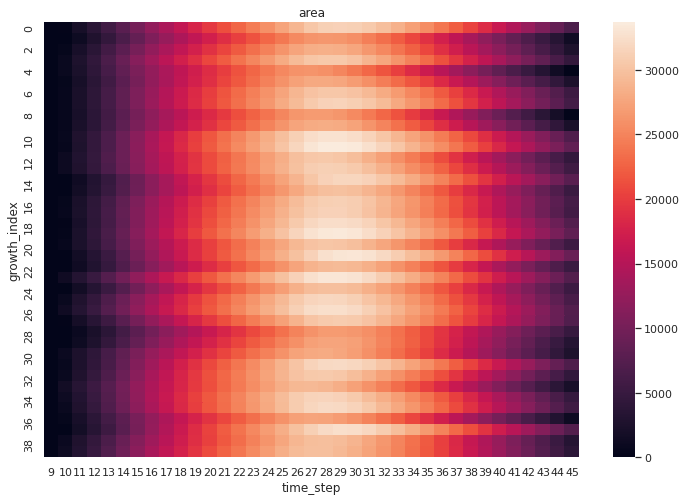

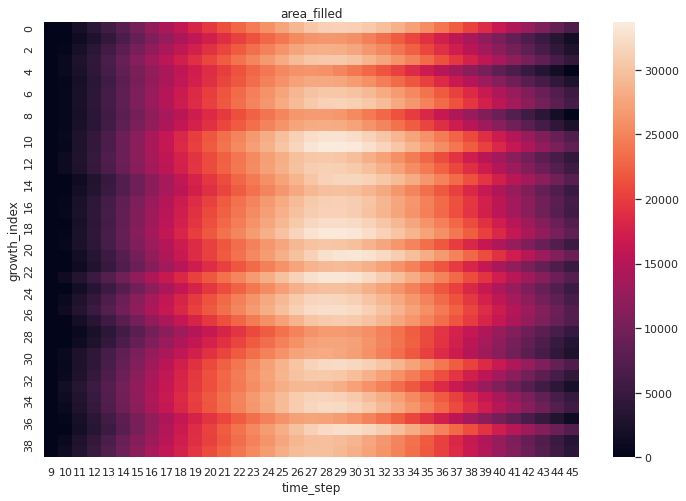

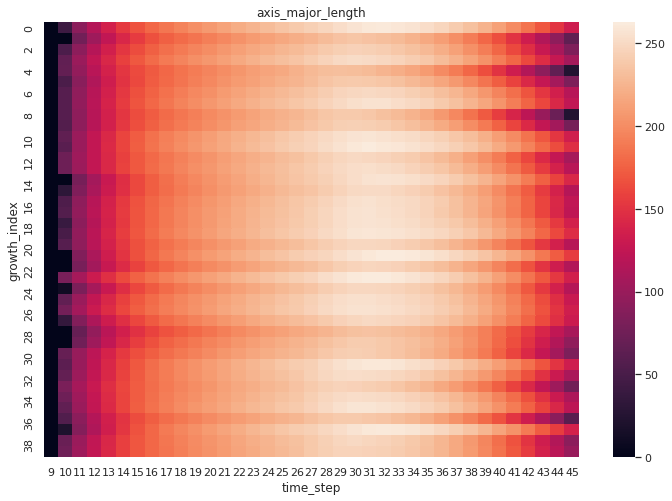

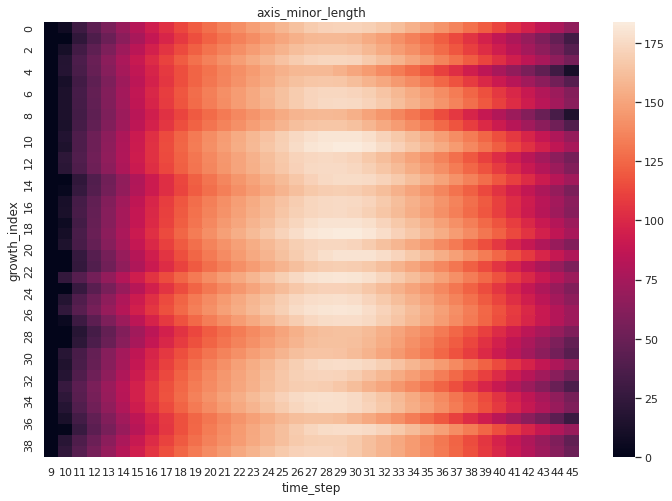

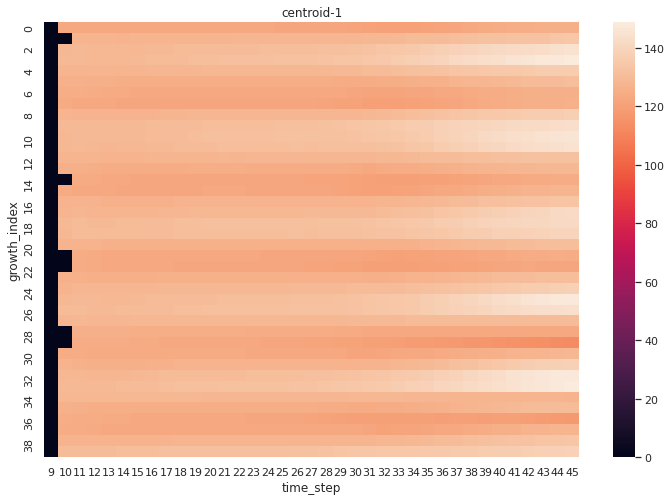

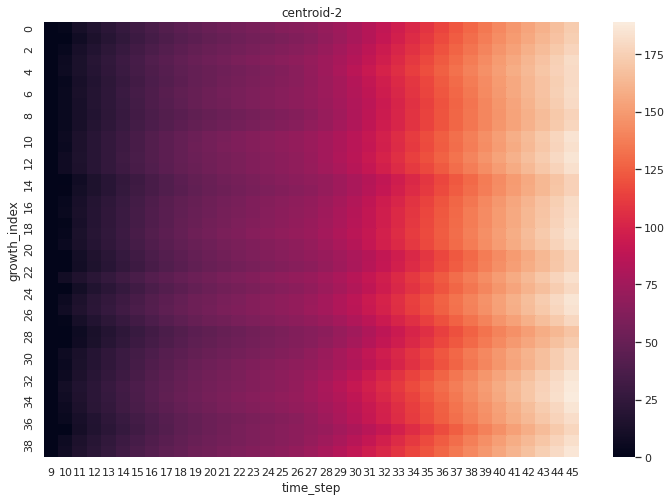

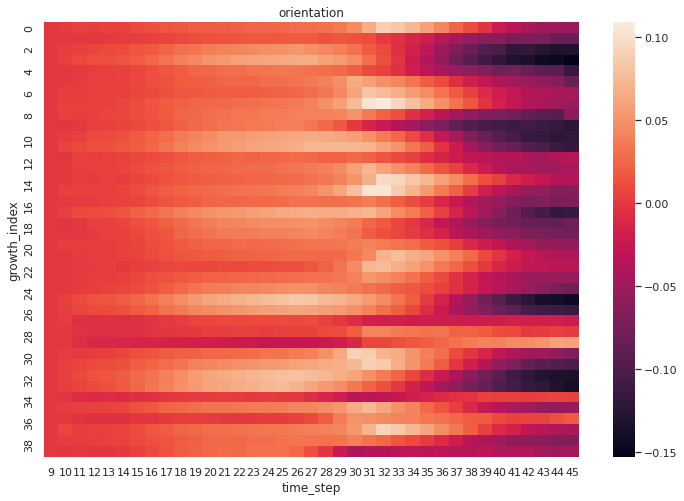

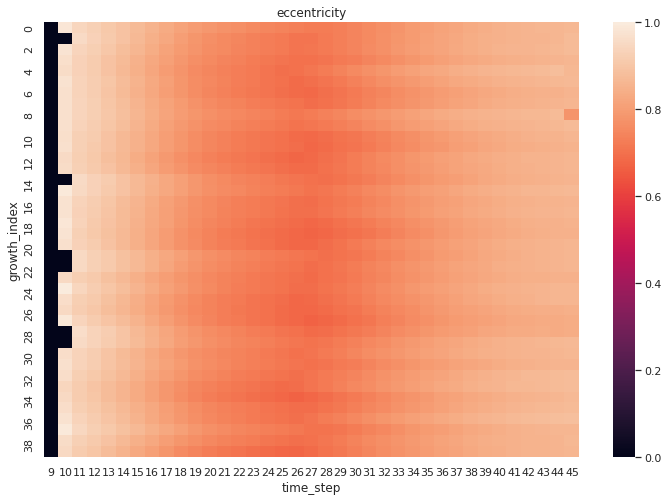

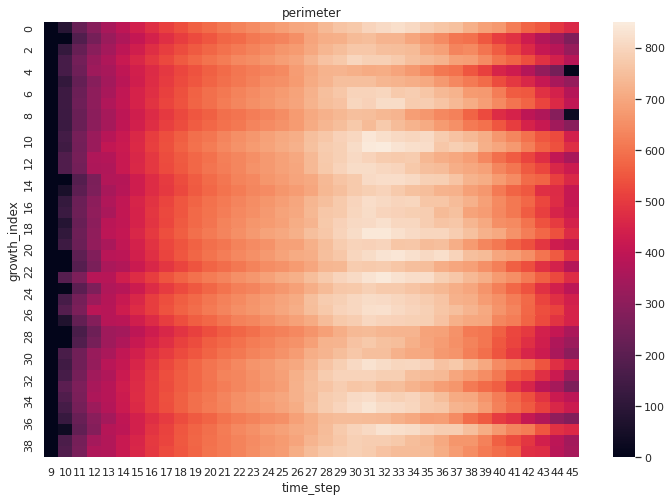

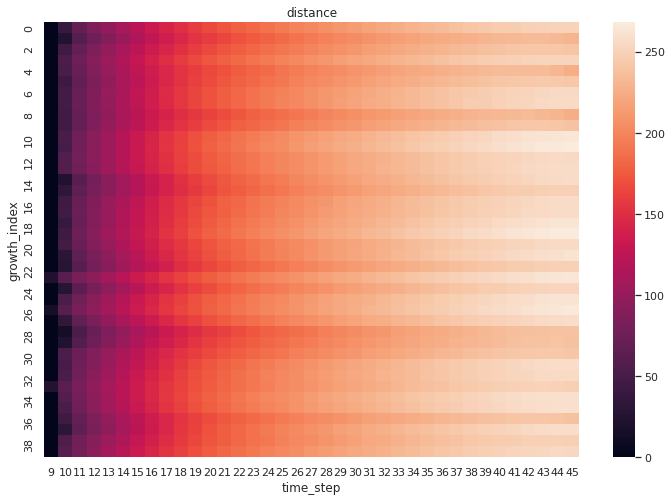

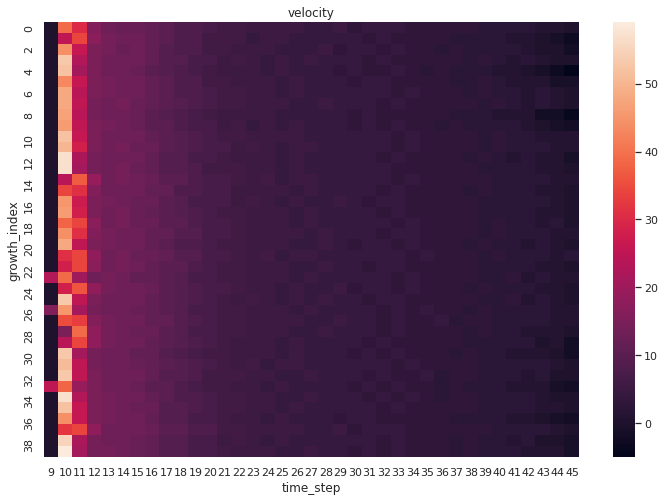

In [21]:
ds_name = '1-SrRuO3(Berkeley_1C)'
condition = '100mj-700c-200mtorr-10hz-growth_2'
df_3 = plot_metrics_all_steps(ds_path, class_name, ds_name, condition)

In [22]:
ds_path = '/scratch/yichen/pld_plumes/YG034_Yichen_Guo_06112022.h5'
class_name = 'PLD_Plumes'
show_h5_dataset_name(ds_path, class_name)

<KeysViewHDF5 ['1-SrRuO3(Berkeley_1C)', '1-SrRuO3(Berkeley_1C)_Pre']>


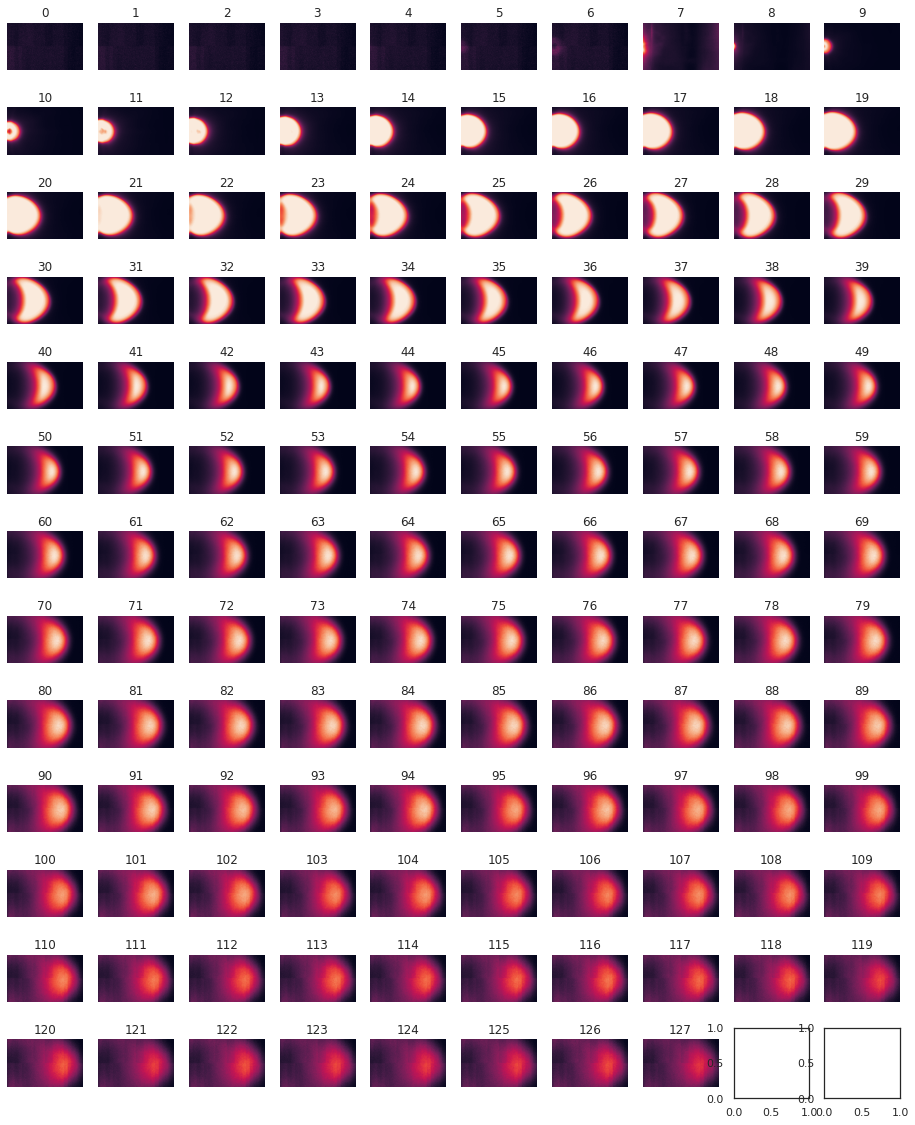

                               condition        metric  growth_index  \
37519  100mj-700c-200mtorr-10hz-growth_3  eccentricity            20   
47169  100mj-700c-200mtorr-10hz-growth_3      distance            17   
39370  100mj-700c-200mtorr-10hz-growth_3  eccentricity            34   
137    100mj-700c-200mtorr-10hz-growth_3          area             1   
34000  100mj-700c-200mtorr-10hz-growth_3   orientation            31   

       time_step        a.u.  
37519         15    0.870767  
47169         65  238.000000  
39370         74    0.000000  
137            9    0.000000  
34000         80    0.000000  
area


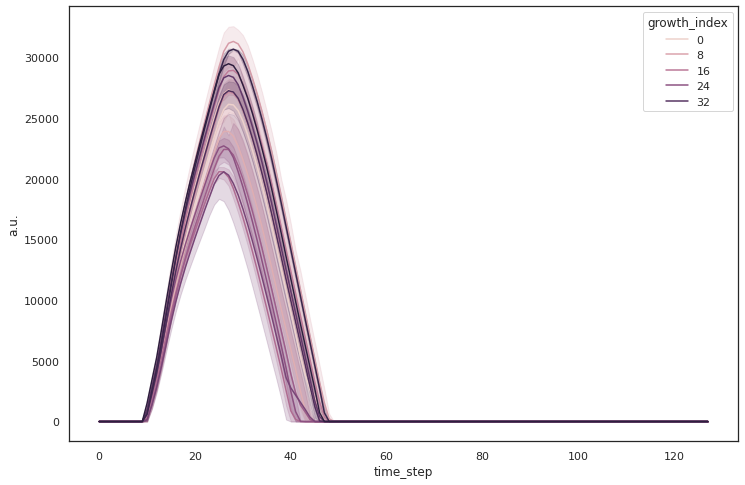

area_filled


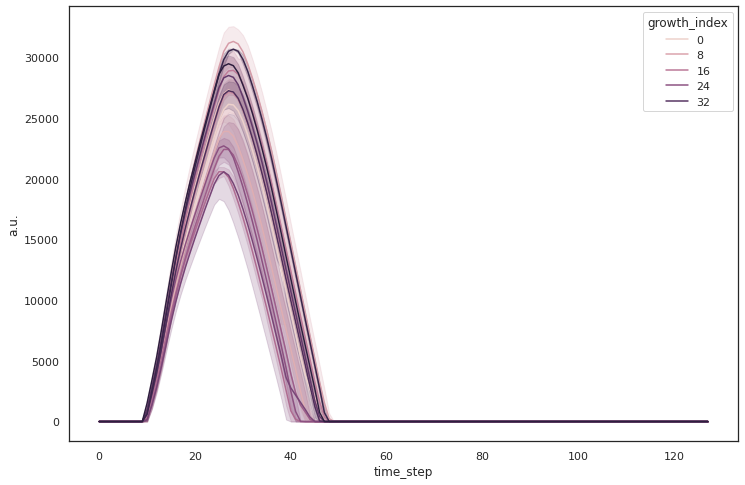

axis_major_length


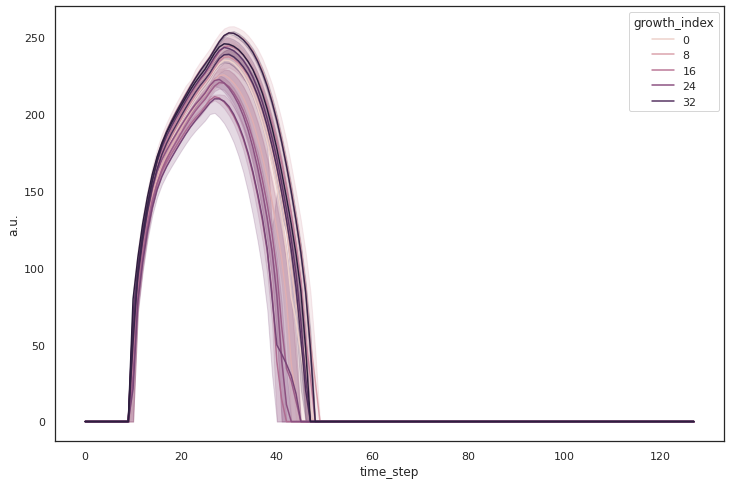

axis_minor_length


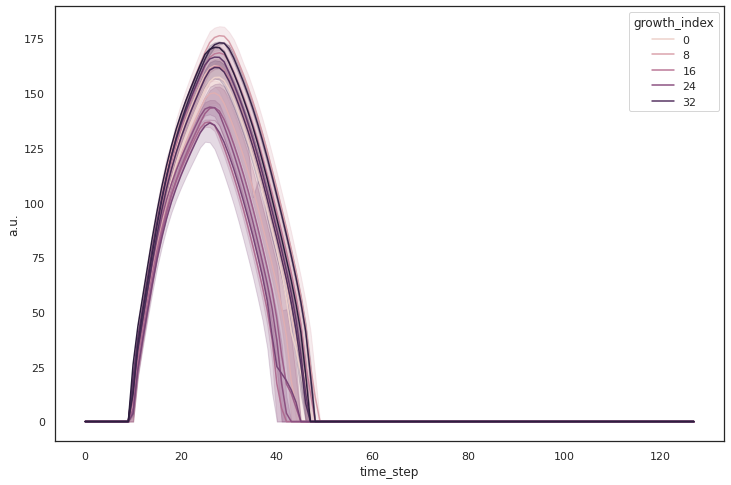

centroid-1


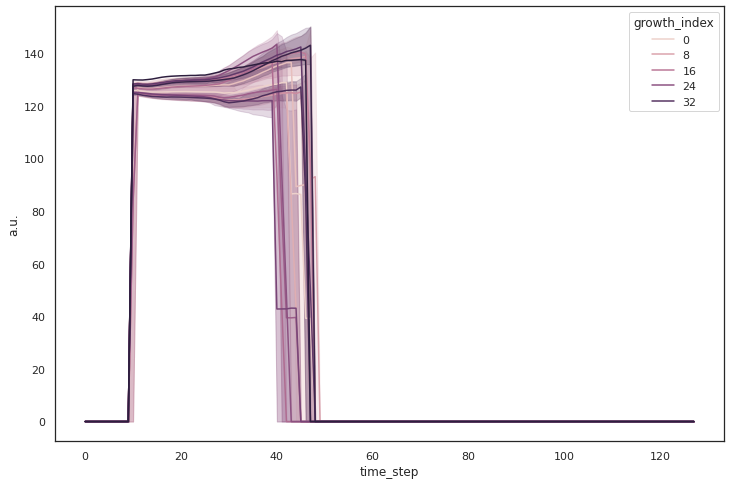

centroid-2


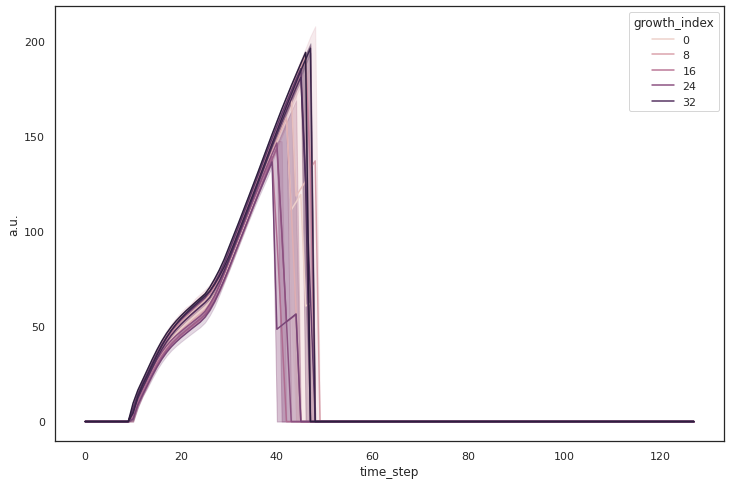

orientation


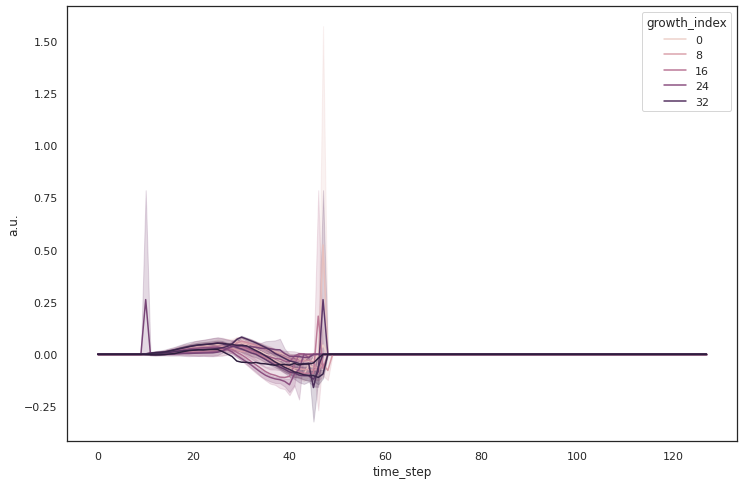

eccentricity


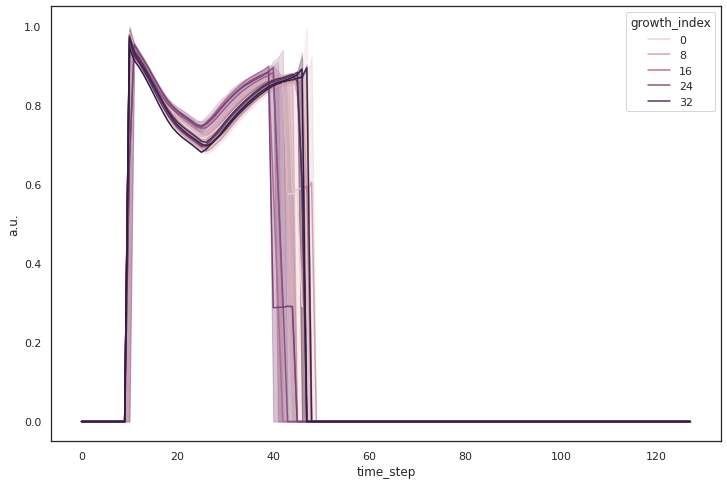

perimeter


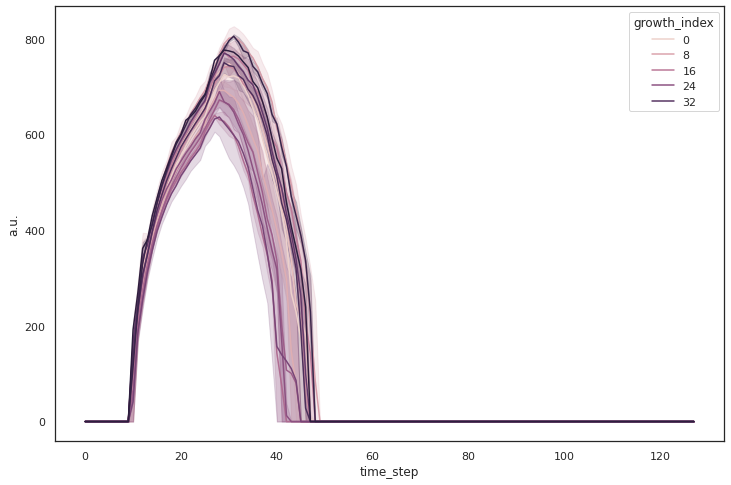

distance


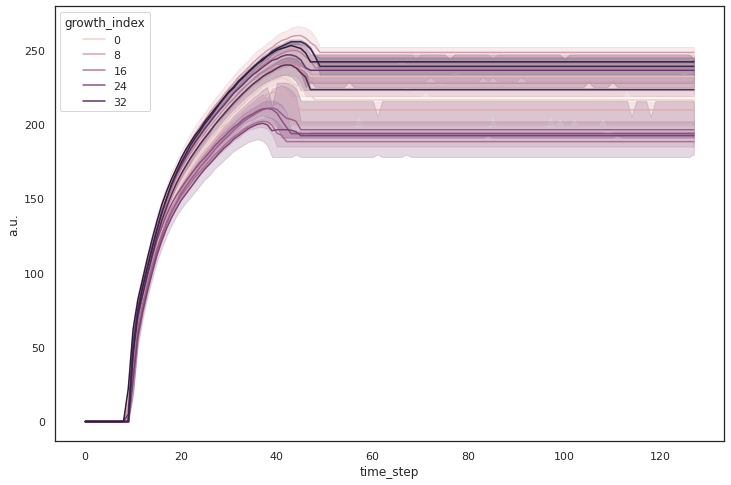

velocity


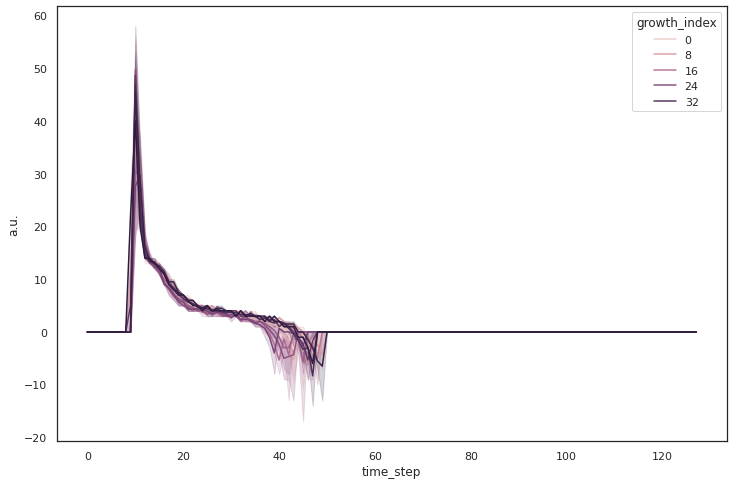

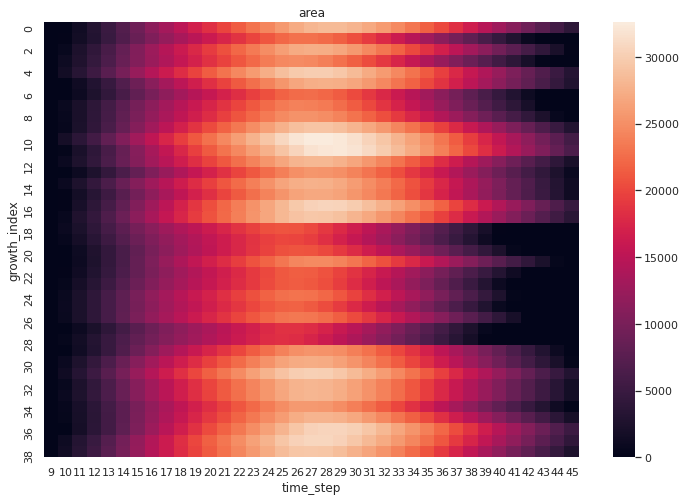

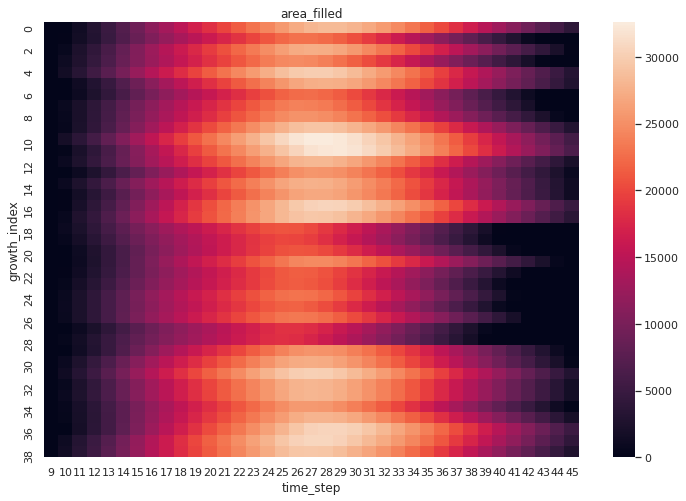

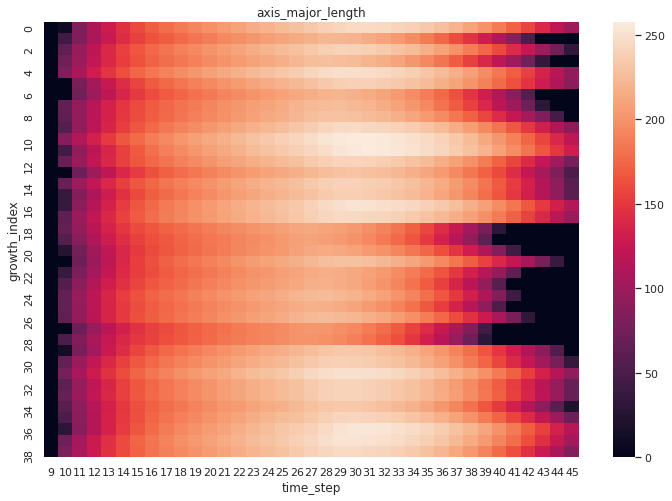

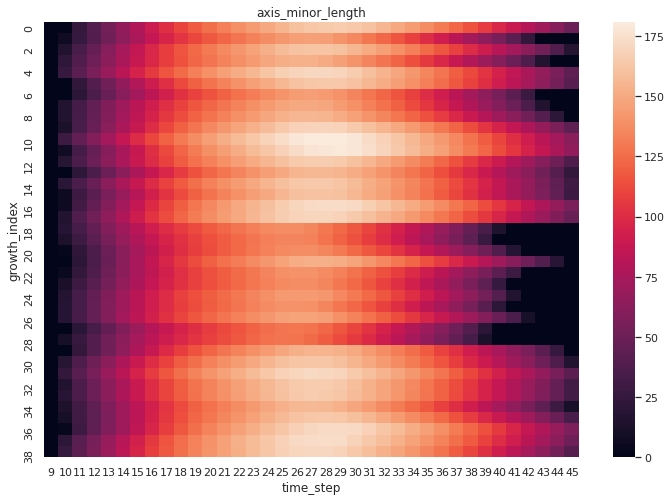

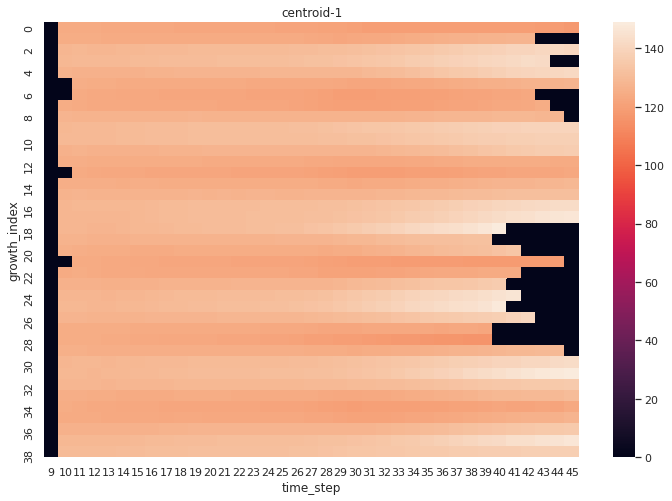

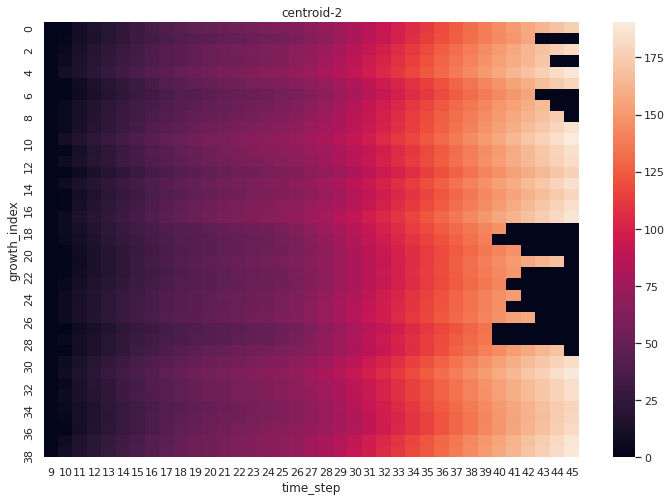

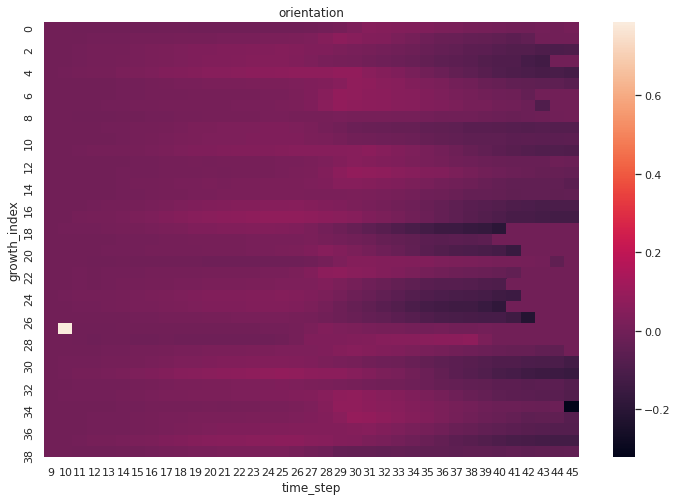

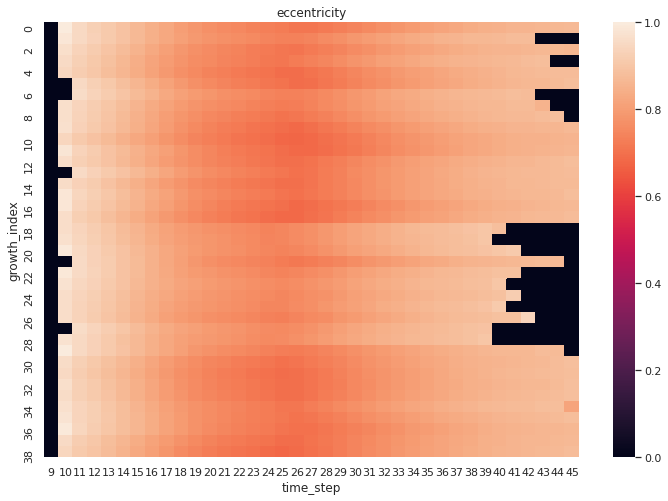

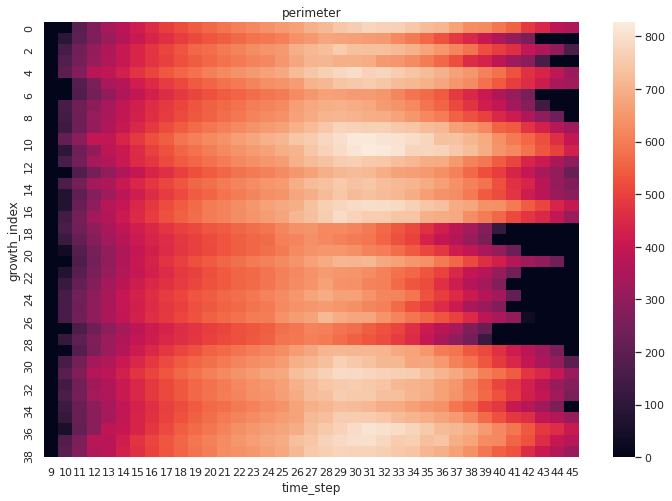

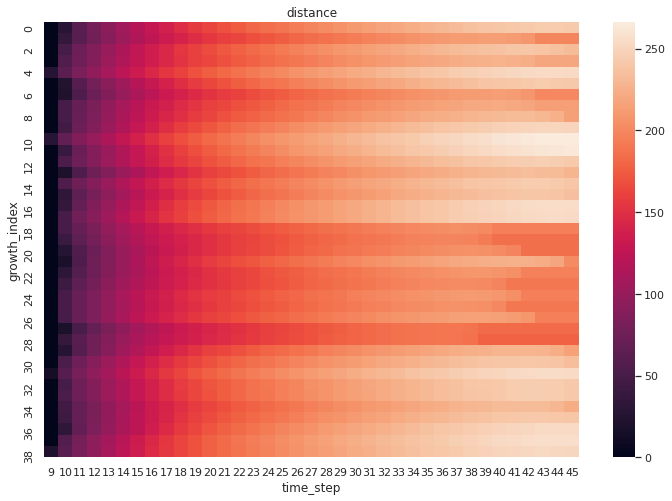

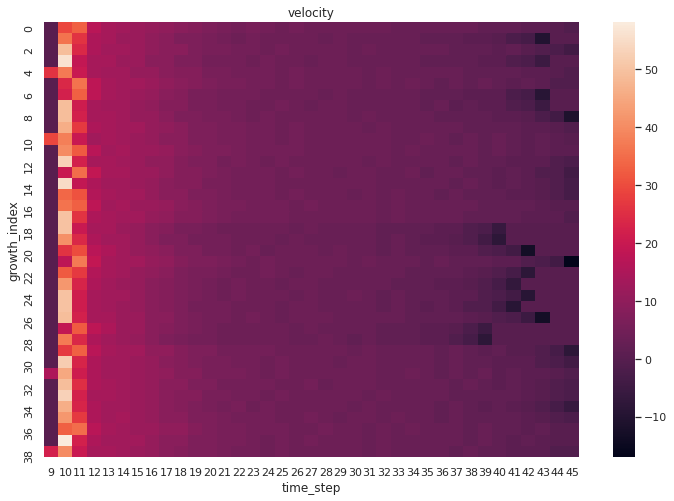

In [23]:
ds_name = '1-SrRuO3(Berkeley_1C)'
condition = '100mj-700c-200mtorr-10hz-growth_3'
df_4 = plot_metrics_all_steps(ds_path, class_name, ds_name, condition)

area


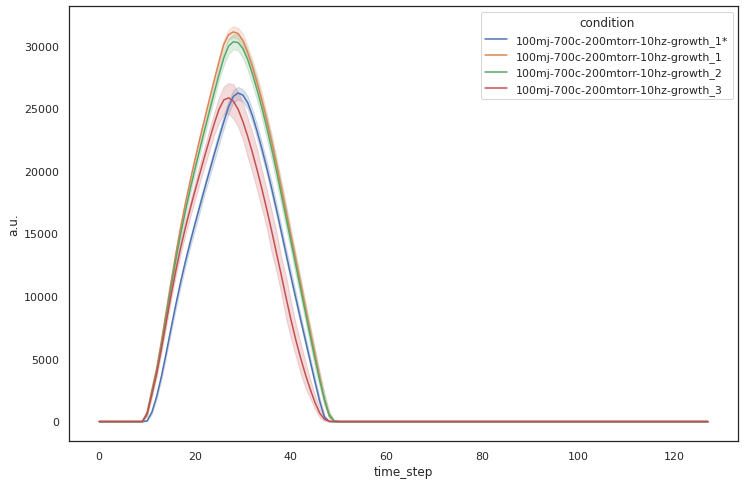

area_filled


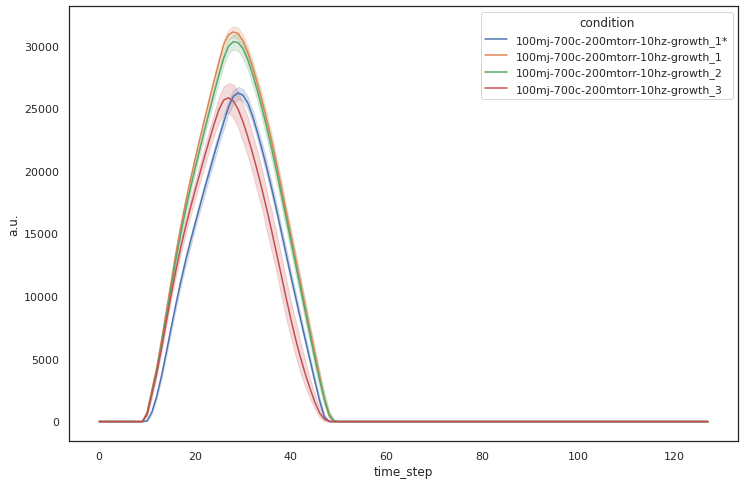

axis_major_length


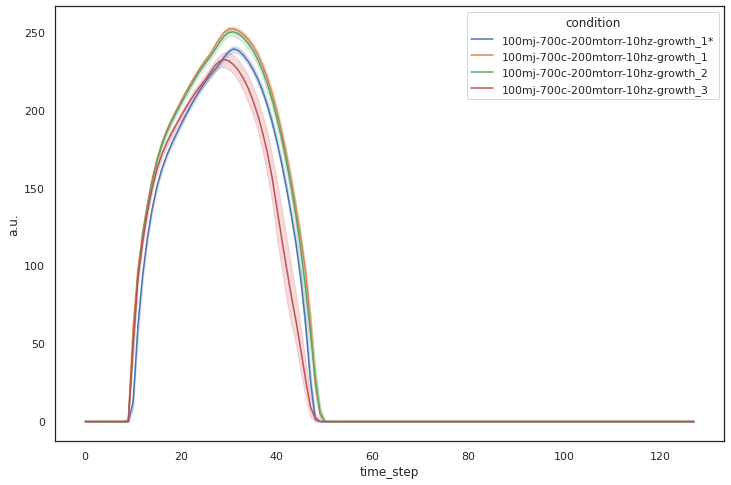

axis_minor_length


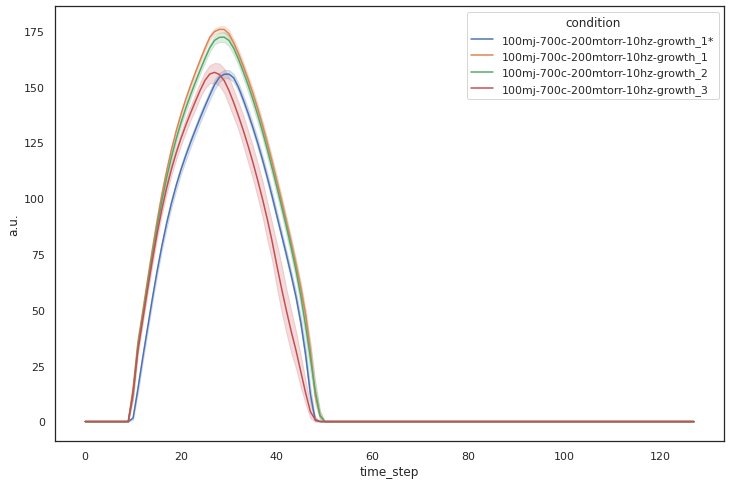

centroid-1


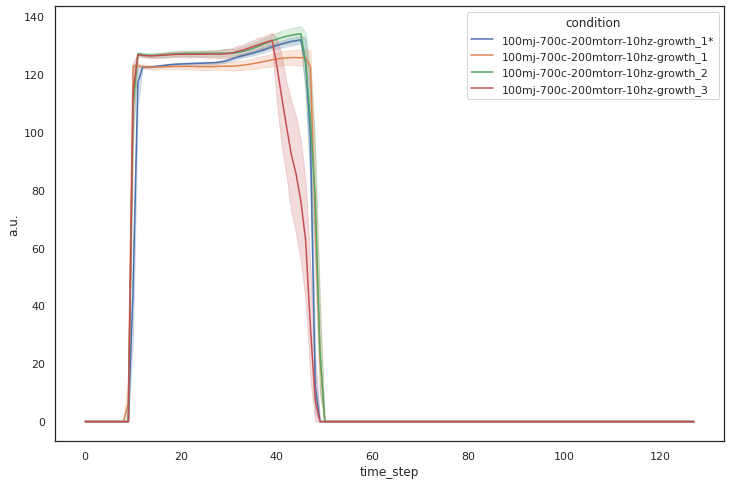

centroid-2


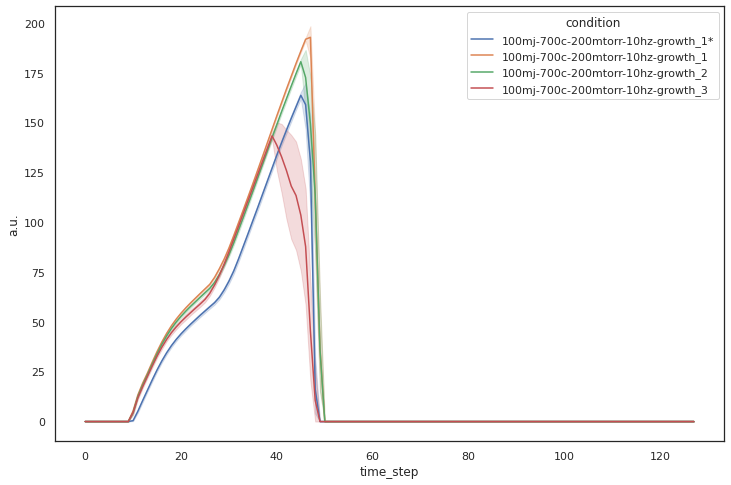

orientation


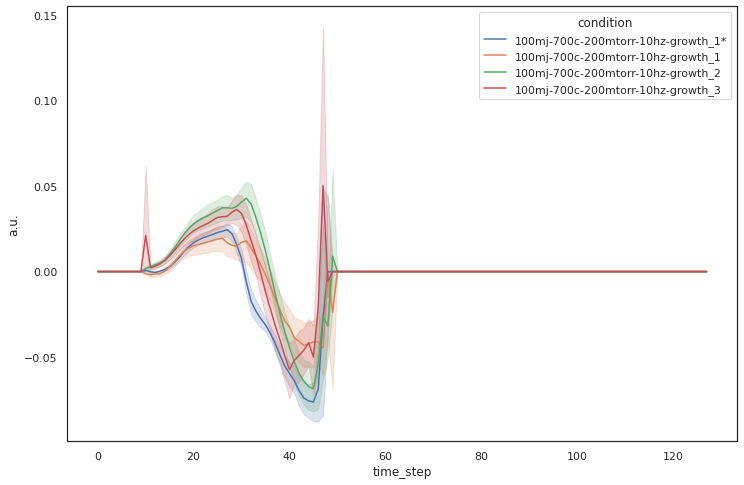

eccentricity


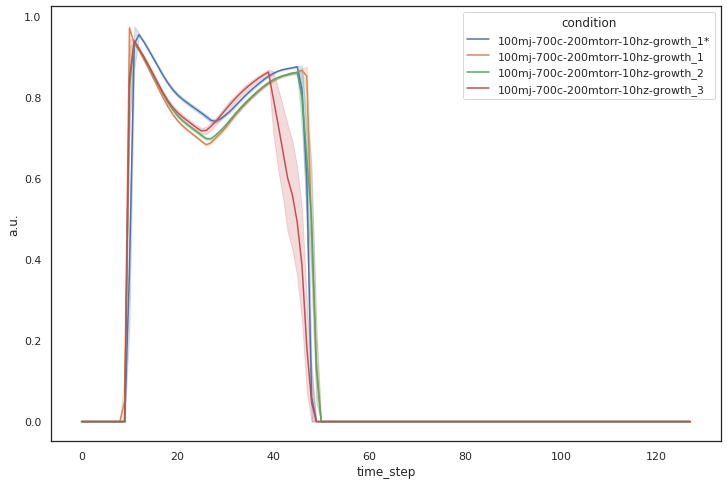

perimeter


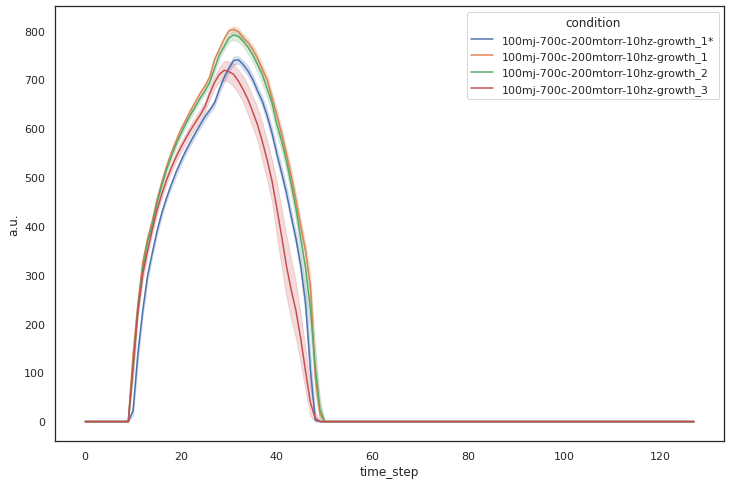

distance


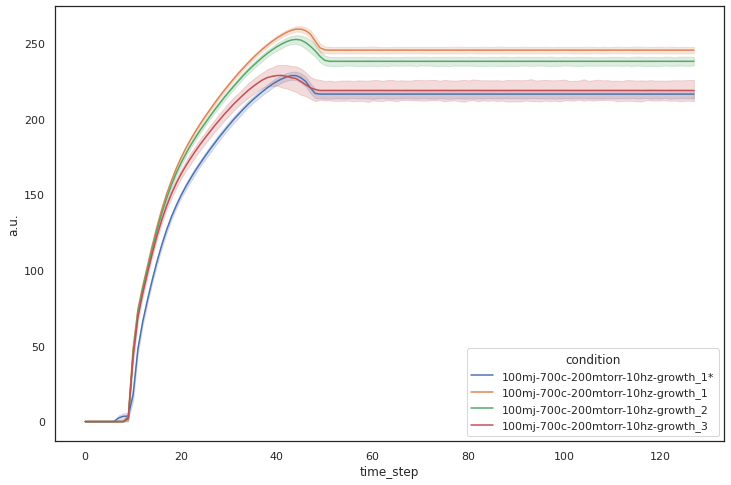

velocity


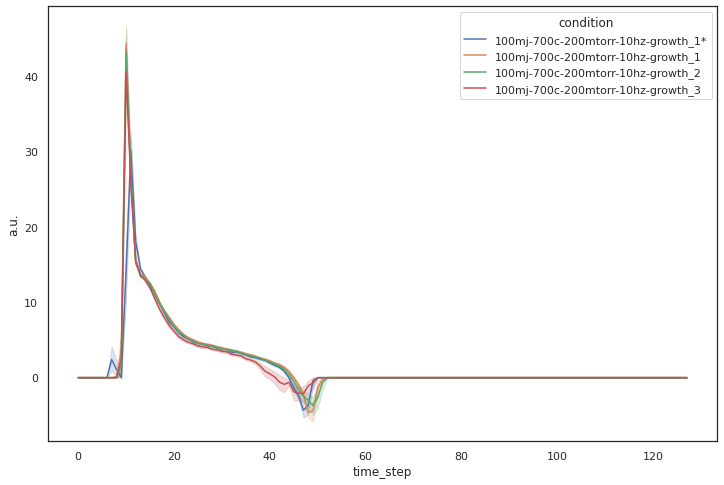

condition    metric  growth_index  time_step  \
0       100mj-700c-200mtorr-10hz-growth_1*      area             0          0   
1       100mj-700c-200mtorr-10hz-growth_1*      area             0          1   
2       100mj-700c-200mtorr-10hz-growth_1*      area             0          2   
3       100mj-700c-200mtorr-10hz-growth_1*      area             0          3   
4       100mj-700c-200mtorr-10hz-growth_1*      area             0          4   
...                                    ...       ...           ...        ...   
232315   100mj-700c-200mtorr-10hz-growth_3  velocity            38        123   
232316   100mj-700c-200mtorr-10hz-growth_3  velocity            38        124   
232317   100mj-700c-200mtorr-10hz-growth_3  velocity            38        125   
232318   100mj-700c-200mtorr-10hz-growth_3  velocity            38        126   
232319   100mj-700c-200mtorr-10hz-growth_3  velocity            38        127   

        a.u.  
0        0.0  
1        0.0  
2        0.0  
3        0.0  
4        0.0  
...      ...  
232315   0.0  
232316   0.0  
232317   0.0  
232318   0.0  
232319   0.0  

[232320 rows x 5 columns]

In [24]:
import pandas as pd

df_all = pd.concat([df_1, df_2, df_3, df_4], ignore_index=True)
plot_metrics(df_all, sort_by='condition')

# upload notebook to dataset

In [25]:
import pandas as pd
import json # For dealing with metadata
import os # For file level operations
from datafed.CommandLib import API

file_name = '06012022-plume_YG031_34.ipynb'
file_path = %pwd
print(file_path+'/'+file_name)

df_api = API()
dc_resp = df_api.dataCreate(file_name,
                            parent_id='c/398047791', # parent collection
                           )

rec_id = dc_resp[0].data[0].id
put_resp = df_api.dataPut(rec_id, # record id
                          file_path+'/'+file_name,
                          wait=True  # Waitcas until transfer completes.
                          )
put_resp

/scratch/yichen/notebooks/PLD_Workflow/06012022-plume_YG031_34.ipynb


(task {
   id: "task/398953586"
   type: TT_DATA_PUT
   status: TS_FAILED
   client: "u/yig319"
   step: 1
   steps: 4
   msg: "file not found"
   ct: 1655146583
   ut: 1655146590
   source: "lehigh#nhi-gpu/scratch/yichen/notebooks/PLD_Workflow/06012022-plume_YG031_34.ipynb"
   dest: "d/398953580"
 },
 'TaskDataReply')